# Iteration Analysis

## Import

In [1]:
import re
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Let's clean up and get rid of the iterations that registered a warning

In [2]:
with open('example.log', 'r') as file:
    text = file.read()

pattern = r"iteration (\d+)"

matches = re.findall(pattern, text)

problematic_iterations = list()

for match in matches:
    if match not in problematic_iterations:
        problematic_iterations.append(match)

In [4]:
len(problematic_iterations)

369

Looks like we only had 369 iterations that were problematic (3.69% of all iterations)

In [5]:
problematic_iterations = [int(iteration) for iteration in problematic_iterations]

### Now let's look at all other iterations in the summary file

In [7]:
results_df = pd.read_csv('./data/iteration_results_summary.csv')

results_df = results_df.loc[~results_df['iteration'].isin(problematic_iterations)]

In [8]:
results_df.shape[0]

9631

## Q: How many scenarios did we see a >=15% increase in revenue compared to a world without memberships?

In [23]:
thresh = 0.15
total_scenarios = 9631
# Month 0
revenue_lift_15_pct_month0_array = np.array((results_df['ride_revenue_adjusted_month0'] - results_df['ride_revenue_wo_memberships_month0']) / results_df['ride_revenue_wo_memberships_month0'])
revenue_lift_15_pct_month0_count = revenue_lift_15_pct_month0_array[revenue_lift_15_pct_month0_array >= thresh].size

print(f'Probability we get a lift of more than 15% in first month: {100 * revenue_lift_15_pct_month0_count / total_scenarios}')

Probability we get a lift of more than 15% in first month: 1.4017236008721836


In [22]:
# Month 1
revenue_lift_15_pct_month1_array = np.array((results_df['ride_revenue_adjusted_month1'] - results_df['ride_revenue_wo_memberships_month1']) / results_df['ride_revenue_wo_memberships_month1'])
revenue_lift_15_pct_month1_count = revenue_lift_15_pct_month1_array[revenue_lift_15_pct_month1_array >= thresh].size

print(f'Probability we get a lift of more than 15% in second month: {100 * revenue_lift_15_pct_month1_count / total_scenarios}')

Probability we get a lift of more than 15% in second month: 6.105285017132178


In [24]:
# Month 2
revenue_lift_15_pct_month2_array = np.array((results_df['ride_revenue_adjusted_month2'] - results_df['ride_revenue_wo_memberships_month2']) / results_df['ride_revenue_wo_memberships_month2'])
revenue_lift_15_pct_month2_count = revenue_lift_15_pct_month2_array[revenue_lift_15_pct_month2_array >= thresh].size

print(f'Probability we get a lift of more than 15% in third month: {100 * revenue_lift_15_pct_month2_count / total_scenarios}')

Probability we get a lift of more than 15% in third month: 1.7443671477520506


## Q: How many scenarios did we see a 0-3% increase (breakeven) in revenue compared ot a world without memberships?

In [28]:
thresh = 0.03
total_scenarios = 9631

# Month 0
revenue_breakeven_pct_month0_array = np.array((results_df['ride_revenue_adjusted_month0'] - results_df['ride_revenue_wo_memberships_month0']) / results_df['ride_revenue_wo_memberships_month0'])
revenue_breakeven_pct_month0_count = revenue_breakeven_pct_month0_array[(revenue_breakeven_pct_month0_array <= thresh) & (revenue_breakeven_pct_month0_array >= 0.0)].size

print(f'Probability we make see 0-3% increase in first month: {100 * revenue_breakeven_pct_month0_count / total_scenarios}')

Probability we make see 0-3% increase in first month: 10.123559339632436


In [29]:
# Month 1
revenue_breakeven_pct_month1_array = np.array((results_df['ride_revenue_adjusted_month1'] - results_df['ride_revenue_wo_memberships_month1']) / results_df['ride_revenue_wo_memberships_month1'])
revenue_breakeven_pct_month1_count = revenue_breakeven_pct_month1_array[(revenue_breakeven_pct_month1_array <= thresh) & (revenue_breakeven_pct_month1_array >= 0.0)].size

print(f'Probability we make see 0-3% increase in second month: {100 * revenue_breakeven_pct_month1_count / total_scenarios}')

Probability we make see 0-3% increase in first month: 18.824628802824215


In [30]:
# Month 2
revenue_breakeven_pct_month2_array = np.array((results_df['ride_revenue_adjusted_month2'] - results_df['ride_revenue_wo_memberships_month2']) / results_df['ride_revenue_wo_memberships_month2'])
revenue_breakeven_pct_month2_count = revenue_breakeven_pct_month2_array[(revenue_breakeven_pct_month2_array <= thresh) & (revenue_breakeven_pct_month2_array >= 0.0)].size

print(f'Probability we make see 0-3% increase in third month: {100 * revenue_breakeven_pct_month2_count / total_scenarios}')

Probability we make see 0-3% increase in third month: 9.843214619458001


## Q: How many scenarios did we see at least breakeven in revenue compared to a world without memberships?

In [36]:
thresh = 0.0
total_scenarios = 9631
# Month 0
revenue_atleast_breakeven_month0_array = np.array((results_df['ride_revenue_adjusted_month0'] - results_df['ride_revenue_wo_memberships_month0']) / results_df['ride_revenue_wo_memberships_month0'])
revenue_atleast_breakeven_month0_count = revenue_atleast_breakeven_month0_array[revenue_atleast_breakeven_month0_array >= thresh].size

print(f'Probability we at least breakeven in first month: {100 * revenue_atleast_breakeven_month0_count / total_scenarios}')

Probability we at least breakeven in first month: 100.0


In [38]:
# Month 1
revenue_atleast_breakeven_month1_array = np.array((results_df['ride_revenue_adjusted_month1'] - results_df['ride_revenue_wo_memberships_month1']) / results_df['ride_revenue_wo_memberships_month1'])
revenue_atleast_breakeven_month1_count = revenue_atleast_breakeven_month1_array[revenue_atleast_breakeven_month1_array >= thresh].size

print(f'Probability we at least breakeven in second month: {100 * revenue_atleast_breakeven_month1_count / total_scenarios}')

Probability we at least breakeven in second month: 80.26165507216281


In [39]:
# Month 2
revenue_atleast_breakeven_month2_array = np.array((results_df['ride_revenue_adjusted_month2'] - results_df['ride_revenue_wo_memberships_month2']) / results_df['ride_revenue_wo_memberships_month2'])
revenue_atleast_breakeven_month2_count = revenue_atleast_breakeven_month2_array[revenue_atleast_breakeven_month2_array >= thresh].size

print(f'Probability we at least breakeven in third month: {100 * revenue_atleast_breakeven_month2_count / total_scenarios}')

Probability we at least breakeven in third month: 100.0


### Q: In the scenarios where we got a +15% bump in revenue in the first month, what were the conditions?

In [43]:
thresh = 0.15
total_scenarios = 9631

pct_revenue_diff_array = np.array((results_df['ride_revenue_adjusted_month0'] - results_df['ride_revenue_wo_memberships_month0']) / results_df['ride_revenue_wo_memberships_month0'])

lift_indices_array = np.argwhere(pct_revenue_diff_array >= thresh).flatten()

In [46]:
lift_15_pct_results_df = results_df.iloc[lift_indices_array,:]

In [66]:
print(f'Avg Historical MAU: {int(lift_15_pct_results_df["mau_month0"].mean())}')
print(f'Avg % of Existing Customers Signing Up for Membership: {100 * lift_15_pct_results_df["existing_customer_uptake_percentage_month0"].mean()}')
print(f'Avg % of New Customers on the platform: {100 * lift_15_pct_results_df["new_signups_percentage_month0"].mean()}')
print(f'Avg % of New Customers who sign up for a membership: {100 * lift_15_pct_results_df["new_customer_uptake_percentage_month0"].mean()}')
print('')
print('*** CONDITIONS FOR NEXT MONTH ***')
print(f'Avg % of Membership Riders (Existing Customers) who are active next month: {100 * lift_15_pct_results_df["probabillity_membership_existing_active_next_month0"].mean()}')
print(f'Avg % of Membership Riders (New Customers) who are active next month: {100 * lift_15_pct_results_df["probability_membership_new_signup_active_next_month0"].mean()}')
print(f'Avg % of Standard Riders who are active next month: {100 * lift_15_pct_results_df["probability_standard_active_next_month0"].mean()}')
print('')
print(f'Avg Number of active customers in next month: {int(lift_15_pct_results_df["total_customers_month1"].mean())}')
      

Avg Historical MAU: 1912
Avg % of Existing Customers Signing Up for Membership: 57.06269827659369
Avg % of New Customers on the platform: 8.218458654814864
Avg % of New Customers who sign up for a membership: 41.20893214223767

*** CONDITIONS FOR NEXT MONTH ***
Avg % of Membership Riders (Existing Customers) who are active next month: 52.76663246006207
Avg % of Membership Riders (New Customers) who are active next month: 58.10669003293179
Avg % of Standard Riders who are active next month: 17.81435120332461

Avg Number of active customers in next month: 2908


### Let's Look at the effect Customer Uptake Percentage had in each Scenario

In [68]:
results_df['ride_revenue_lift_month0'] = (results_df['ride_revenue_adjusted_month0'] - results_df['ride_revenue_wo_memberships_month0']) / results_df['ride_revenue_wo_memberships_month0']
results_df['ride_revenue_lift_month1'] = (results_df['ride_revenue_adjusted_month1'] - results_df['ride_revenue_wo_memberships_month1']) / results_df['ride_revenue_wo_memberships_month1']
results_df['ride_revenue_lift_month2'] = (results_df['ride_revenue_adjusted_month2'] - results_df['ride_revenue_wo_memberships_month2']) / results_df['ride_revenue_wo_memberships_month2']

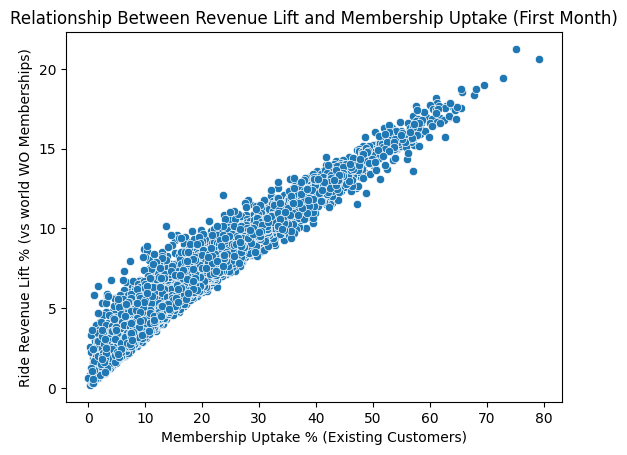

In [82]:
x = 100 * results_df['existing_customer_uptake_percentage_month0']
y = 100 * results_df['ride_revenue_lift_month0']

ax = sns.scatterplot(x=x, y=y)
ax.set(xlabel = 'Membership Uptake % (Existing Customers)',
       ylabel = 'Ride Revenue Lift % (vs world WO Memberships)',
       title = 'Relationship Between Revenue Lift and Membership Uptake (First Month)')

plt.show()

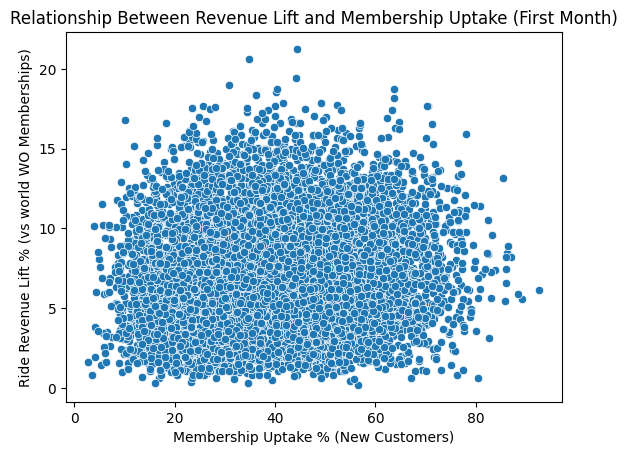

In [83]:
x = 100 * results_df['new_customer_uptake_percentage_month0']
y = 100 * results_df['ride_revenue_lift_month0']

ax = sns.scatterplot(x=x, y=y)
ax.set(xlabel = 'Membership Uptake % (New Customers)',
       ylabel = 'Ride Revenue Lift % (vs world WO Memberships)',
       title = 'Relationship Between Revenue Lift and Membership Uptake (First Month)')

plt.show()

# Looking at sim v2 Results

In [2]:
import re
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
from tqdm.notebook import tqdm

In [108]:
results_df = pd.read_csv('./data/v2_6.99_price_iteration_results_summary.csv')

# results_df = results_df.loc[~results_df['iteration'].isin(problematic_iterations)]

## First, let's look at analyzing the breakeven / late signup members

In [3]:
results_df.columns

Index(['iteration', 'mau_month0', 'total_customers_month0',
       'new_signups_percentage_month0',
       'existing_customer_uptake_percentage_month0', 'total_late_signups',
       'new_customer_uptake_percentage_month0',
       'probability_membership_new_signup_active_next_month0',
       'probabillity_membership_existing_active_next_month0',
       'probability_standard_active_next_month0',
       'counterfactual_ride_revenue_month0',
       'counterfactual_number_rides_taken_month0',
       'total_membership_revenue_month0',
       'treatment_world_number_rides_taken_month0',
       'num_customers_riding_over_breakeven',
       'total_membership_revenue_riders_over_breakeven',
       'total_standard_revenue_riders_over_breakeven',
       'total_membership_ride_mintues_riders_over_breakeven',
       'total_standard_ride_mintues_riders_over_breakeven',
       'num_membership_rides_riders_over_breakeven',
       'num_standard_rides_riders_over_breakeven'],
      dtype='object')

Need to do a little bit of munging since we forgot to get the. Let's get reacclimated to the revenue metrics again
- Initial standard ride revenue: Ride revenue treating everyone as a standard rider and typical riding minutes behavior (counterfactual world)
- Initial membershiup ride revenue array: Ride revenue treating everyone as a membership rider and typical rider minutes behavior (if everyone was a membership rider)
- Adjusted standard ride revenue is actually the membership from those who signed up for a membership from the jump and had the $0 unlock fee applied
- Steps to calculate monthly revenue in those scenario
1. Grab the counterfactual world revenue by summing `initial_stndard_ride_revenue`
2. For membership world
   - for all months, sum the membership_revenue to get monthly subscription revenue
   - check for the following
   - if `is_existing_customer` False and `Membership_signed_up` False then sum `initial_standard_revenue`
   - if `existing_customer_late_signup` False and `Membership_signed_up` True then sum `adjusted_standard_ride_revenue`
   - if `existing_customer_late_signup` True then sum `initial_standard_revenue` and `adjusted_membership_ride_revenue

In [3]:
file_path = '/Users/tim.velasquez/Documents/product/exploration/pricing_risk_analysis/data/v2_6.99_price_results/'
file_pattern = '*m0_results.csv'
file_list = glob(file_path + file_pattern)

In [17]:
iteration_revenue_results_list = list()
iteration_counter = 0
BREAKEVEN_RIDES = 7
for csv in file_list:
    results_df = pd.read_csv(csv)

    # revenue results

    control1_world_revenue = results_df.loc[:, 'total_control_ride_revenue'].sum()  # modeled control rides
    control2_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() # initial ride revenue taken
    control3_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() + results_df.loc[:, 'initial_membership_ride_revenue'].sum()  # a world where baseline includes the addiitional rides from a hypothetical membership
    
    standard_rider_revenue = results_df.loc[results_df.membership_signed_up==False, 'initial_standard_ride_revenue'].sum()
    
    subscription_revenue = results_df.membership_revenue.sum()
    early_membership_signup_revenue = results_df.loc[((results_df.existing_customer_late_signup==False) & (results_df.membership_signed_up==True)), 
                                        'adjusted_standard_ride_revenue'].sum()
    standard_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'initial_standard_ride_revenue'].sum()  # revenue from portion of their ride history where
    membership_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'adjusted_membership_ride_revenue'].sum()

    late_signup_unused_membership_revenue = np.sum(results_df.loc[results_df.existing_customer_late_signup==True, 'membership_revenue'] - results_df.loc[( (results_df.existing_customer_late_signup==True) & 
                                                                                                                                                   (results_df.additional_rides_taken < BREAKEVEN_RIDES)), 'additional_rides_taken'])
    
    early_signup_unused_membership_revenue = np.sum(results_df.loc[( (results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup!=True) ), 'membership_revenue'] - results_df.loc[( ((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup!=True)) ) & 
                                                                                                                                                                                               (results_df.total_rides_taken < BREAKEVEN_RIDES), 'total_rides_taken'])
    
    treatment_world_revenue = np.sum([subscription_revenue,
                                      standard_rider_revenue,
                                      early_membership_signup_revenue,
                                      standard_late_signup_revenue,
                                      membership_late_signup_revenue])

    adjusted_treatment_world_revenue = treatment_world_revenue - np.sum([late_signup_unused_membership_revenue,
                                                                         early_signup_unused_membership_revenue])

    # ride count results
    control1_world_rides_count = results_df.loc[:, 'rides_taken_control'].sum()
    control2_world_rides_count = results_df.loc[:, 'rides_taken'].sum()
    control3_world_rides_count = results_df.loc[:, 'total_rides_taken'].sum()
    # TODO: can we also include rides_taken_control?
    
    standard_rides_count = results_df.loc[results_df.membership_signed_up==False, 'total_rides_taken'].sum()
    early_membership_rides_count = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_rides_taken'].sum()

    standard_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()
    membership_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()

    treatment_world_rides_count = np.sum([standard_rides_count,
                                          early_membership_rides_count,
                                          standard_late_signup_rides_count,
                                          membership_late_signup_rides_count])

    # minutes
    total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].sum()
    
    total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].sum()
    early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].sum()
    standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].sum()
    membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].sum()

    # rider type properties
    avg_total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].mean()
    
    avg_total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].mean()
    avg_early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].mean()
    avg_standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].mean()
    avg_membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].mean()
    

    iteration_results_dict = {'iteration': iteration_counter,
                              'control1_world_revenue': control1_world_revenue,
                              'control2_world_revenue': control2_world_revenue,
                              'control3_world_revenue': control3_world_revenue,
                              'treatment_world_revenue': treatment_world_revenue,
                              'adjusted_treatment_world_revenue': adjusted_treatment_world_revenue,
                              'control1_world_rides_count': control1_world_rides_count,
                              'control2_world_rides_count': control2_world_rides_count,
                              'treatment_world_rides_count': treatment_world_rides_count,
                              'standard_rider_revenue': standard_rider_revenue,
                              'subscription_revenue': subscription_revenue,
                              'early_membership_signup_revenue': early_membership_signup_revenue,
                              'standard_late_signup_revenue': standard_late_signup_revenue,
                              'membership_late_signup_revenue': membership_late_signup_revenue,
                              'late_signup_unused_membership_revenue': late_signup_unused_membership_revenue,
                              'early_signup_unused_membership_revenue': early_signup_unused_membership_revenue,
                              'standard_rides_count': standard_rides_count,
                              'early_membership_rides_count': early_membership_rides_count,
                              'standard_late_signup_rides_count': standard_late_signup_rides_count,
                              'membership_late_signup_rides_count': membership_late_signup_rides_count,
                              'total_control_ride_minutes': total_control_ride_minutes,
                              'total_standard_ride_minutes': total_standard_ride_minutes,
                              'early_membership_ride_minutes': early_membership_ride_minutes,
                              'standard_late_signup_ride_minutes': standard_late_signup_ride_minutes,
                              'membership_late_signup_ride_minutes': membership_late_signup_ride_minutes,
                              'avg_total_control_ride_minutes': avg_total_control_ride_minutes,
                              'avg_total_standard_ride_minutes': avg_total_standard_ride_minutes,
                              'avg_early_membership_ride_minutes': avg_early_membership_ride_minutes,
                              'avg_standard_late_signup_ride_minutes': avg_standard_late_signup_ride_minutes,
                              'avg_membership_late_signup_ride_minutes': avg_membership_late_signup_ride_minutes}

    iteration_revenue_results_list.append(iteration_results_dict)

    iteration_counter += 1

In [18]:
v2_699_iteration_revenue_summary_df = pd.DataFrame(iteration_revenue_results_list)

In [19]:
v2_699_iteration_revenue_summary_df.head(60)

,iteration,control1_world_revenue,control2_world_revenue,control3_world_revenue,treatment_world_revenue,adjusted_treatment_world_revenue,control1_world_rides_count,control2_world_rides_count,treatment_world_rides_count,standard_rider_revenue,subscription_revenue,early_membership_signup_revenue,standard_late_signup_revenue,membership_late_signup_revenue,late_signup_unused_membership_revenue,early_signup_unused_membership_revenue,standard_rides_count,early_membership_rides_count,standard_late_signup_rides_count,membership_late_signup_rides_count,total_control_ride_minutes,total_standard_ride_minutes,early_membership_ride_minutes,standard_late_signup_ride_minutes,membership_late_signup_ride_minutes,avg_total_control_ride_minutes,avg_total_standard_ride_minutes,avg_early_membership_ride_minutes,avg_standard_late_signup_ride_minutes,avg_membership_late_signup_ride_minutes
0,0,30764.788765,30796.373282,34613.104532,36407.278183,34191.638183,6501,6628,10547,18464.658832,3222.39,0.0,11890.573120,2829.656232,2212.67,2.97,3893,0,3327,3327,62214.842988,37363.227774,0.0,24045.059282,7255.528799,30.617541,23.783086,NaN,55.531315,16.756418
1,1,30735.876134,30674.844707,34882.086917,35604.417442,33468.547442,6499,6851,10060,18187.276562,3439.08,0.0,11232.150725,2745.910155,2133.89,1.98,3874,0,3093,3093,62145.836242,36700.709134,0.0,22782.437755,7040.795269,30.007647,23.243008,NaN,55.297179,17.089309
2,2,27838.495762,27436.769298,30533.026368,32197.779315,30370.299315,5847,5897,9126,17750.248551,2537.37,0.0,9550.229155,2359.931608,1826.49,0.99,3776,0,2675,2675,56388.450672,35831.406541,0.0,19256.997834,6051.106688,30.202705,23.824073,NaN,54.707380,17.190644
3,3,29495.286680,29509.364753,32992.746261,33914.121641,31953.841641,6248,6538,9416,18548.140802,3012.69,0.0,10024.509715,2328.781124,1955.33,4.95,3948,0,2734,2734,59608.427386,37436.258467,0.0,20293.614654,5971.233651,29.392716,23.441615,NaN,54.996246,16.182205
4,4,33130.186441,32323.235232,36654.441212,37562.282792,35296.702792,6884,7340,10651,19485.238939,3697.71,0.0,11533.622845,2845.711008,2257.66,7.92,4137,0,3257,3257,67297.913951,39354.458817,0.0,23229.802167,7296.694892,30.465330,23.425273,NaN,53.401844,16.774011
5,5,31169.119606,31195.695202,35031.797052,36300.306743,34107.526743,6572,6844,10249,19081.845608,3313.26,0.0,11281.848548,2623.352587,2187.83,4.95,4005,0,3122,3122,63069.537451,38658.578483,0.0,22786.791148,6726.545096,30.468376,24.222167,NaN,54.644583,16.130804
6,6,34346.198552,34714.568725,39351.935180,40609.552943,38180.282943,7290,7606,11522,20618.624113,3802.56,0.0,13025.617887,3162.750942,2427.29,1.98,4354,0,3584,3584,69374.868082,41704.164393,0.0,26463.122788,8109.617801,30.683268,24.288972,NaN,55.947405,17.145069
7,7,27995.404064,27891.754467,31213.678087,32190.950049,30393.530049,5881,6114,9001,17609.633093,2809.98,0.0,9528.766763,2242.570193,1788.51,8.91,3741,0,2630,2630,56703.600165,35560.597674,0.0,19358.376317,5750.179981,29.138541,23.031475,NaN,55.468127,16.476160
8,8,30221.592057,30194.990256,34143.651440,35746.662986,33492.022986,6402,6580,10351,17903.760695,3320.25,0.0,11716.699404,2805.952888,2251.67,2.97,3785,0,3283,3283,61075.877069,36201.950499,0.0,23629.998471,7194.750994,30.492200,23.692376,NaN,54.447001,16.577767
9,9,30596.017451,30482.069615,34212.910245,35950.555672,33816.675672,6477,6602,10274,19042.403959,3054.63,0.0,11087.088737,2766.432975,2132.89,0.99,4030,0,3122,3122,61843.634491,38493.343486,0.0,22338.689070,7093.417886,29.561967,23.258818,NaN,54.220119,17.217034


In [22]:
v2_699_iteration_revenue_summary_df.to_csv('data/v2_699_iteration_revenue_summary.csv', index=False)

In [114]:
v2_699_iteration_revenue_summary_df['absolute1_revenue_lift'] = v2_699_iteration_revenue_summary_df['treatment_world_revenue'] - v2_699_iteration_revenue_summary_df['control1_world_revenue']
v2_699_iteration_revenue_summary_df['absolute2_revenue_lift'] = v2_699_iteration_revenue_summary_df['treatment_world_revenue'] - v2_699_iteration_revenue_summary_df['control2_world_revenue']
v2_699_iteration_revenue_summary_df['absolute3_revenue_lift'] = v2_699_iteration_revenue_summary_df['treatment_world_revenue'] - v2_699_iteration_revenue_summary_df['control3_world_revenue']


In [21]:
v2_699_iteration_revenue_summary_df['relative1_revenue_lift'] = (v2_699_iteration_revenue_summary_df['treatment_world_revenue'] - v2_699_iteration_revenue_summary_df['control1_world_revenue']) / v2_699_iteration_revenue_summary_df['control1_world_revenue']
v2_699_iteration_revenue_summary_df['relative2_revenue_lift'] = (v2_699_iteration_revenue_summary_df['treatment_world_revenue'] - v2_699_iteration_revenue_summary_df['control2_world_revenue']) / v2_699_iteration_revenue_summary_df['control2_world_revenue']
v2_699_iteration_revenue_summary_df['relative3_revenue_lift'] = (v2_699_iteration_revenue_summary_df['treatment_world_revenue'] - v2_699_iteration_revenue_summary_df['control3_world_revenue']) / v2_699_iteration_revenue_summary_df['control3_world_revenue']

v2_699_iteration_revenue_summary_df['adj_relative1_revenue_lift'] = (v2_699_iteration_revenue_summary_df['adjusted_treatment_world_revenue'] - v2_699_iteration_revenue_summary_df['control1_world_revenue']) / v2_699_iteration_revenue_summary_df['control1_world_revenue']
v2_699_iteration_revenue_summary_df['adj_relative2_revenue_lift'] = (v2_699_iteration_revenue_summary_df['adjusted_treatment_world_revenue'] - v2_699_iteration_revenue_summary_df['control2_world_revenue']) / v2_699_iteration_revenue_summary_df['control2_world_revenue']
v2_699_iteration_revenue_summary_df['adj_relative3_revenue_lift'] = (v2_699_iteration_revenue_summary_df['adjusted_treatment_world_revenue'] - v2_699_iteration_revenue_summary_df['control3_world_revenue']) / v2_699_iteration_revenue_summary_df['control3_world_revenue']



In [215]:
v2_699_iteration_revenue_summary_df['relative1_ride_count_lift'] = (v2_699_iteration_revenue_summary_df['treatment_world_rides_count'] - v2_699_iteration_revenue_summary_df['control_world_rides_count']) / v2_699_iteration_revenue_summary_df['control_world_rides_count']

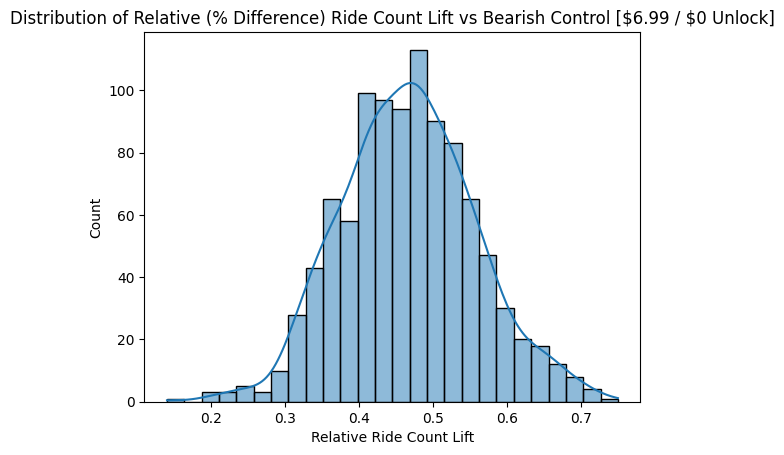

In [216]:
ax = sns.histplot(v2_699_iteration_revenue_summary_df['relative1_ride_count_lift'], kde=True)
ax.set(xlabel = 'Relative Ride Count Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Ride Count Lift vs Bearish Control [\$6.99 / \$0 Unlock]')

plt.show()

<Axes: xlabel='relative1_ride_count_lift', ylabel='relative1_revenue_lift'>

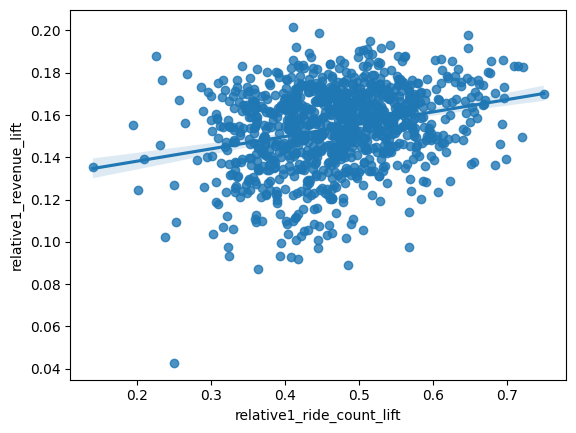

In [220]:
sns.regplot(x=v2_699_iteration_revenue_summary_df['relative1_ride_count_lift'], 
                y=v2_699_iteration_revenue_summary_df['relative1_revenue_lift'],
           fit_reg=True)

<Axes: xlabel='treatment_world_rides_count', ylabel='relative1_revenue_lift'>

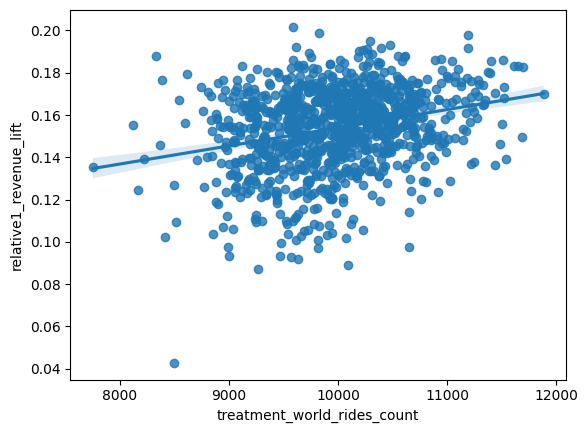

In [221]:
sns.regplot(x=v2_699_iteration_revenue_summary_df['treatment_world_rides_count'], 
                y=v2_699_iteration_revenue_summary_df['relative1_revenue_lift'],
           fit_reg=True)

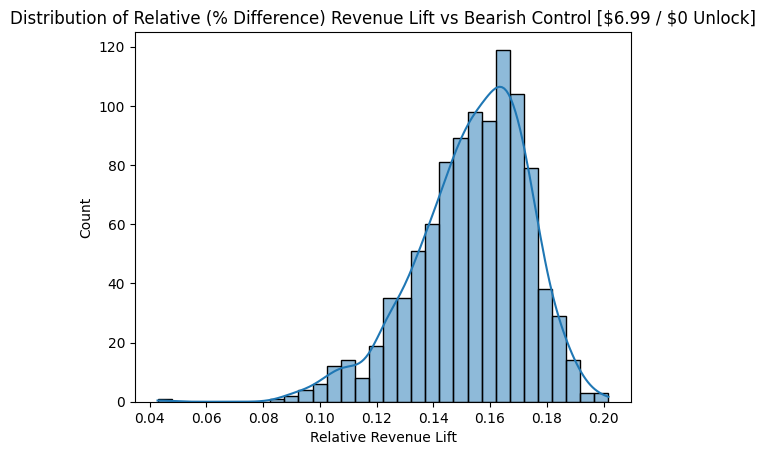

In [157]:
ax = sns.histplot(v2_699_iteration_revenue_summary_df['relative1_revenue_lift'], kde=True)
ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Bearish Control [\$6.99 / \$0 Unlock]')

plt.show()

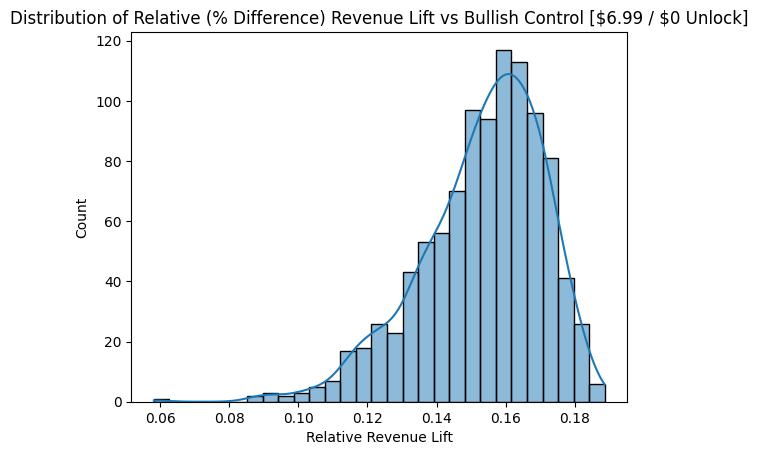

In [158]:
ax = sns.histplot(v2_699_iteration_revenue_summary_df['relative2_revenue_lift'], kde=True)
ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Bullish Control [\$6.99 / \$0 Unlock]')

plt.show()

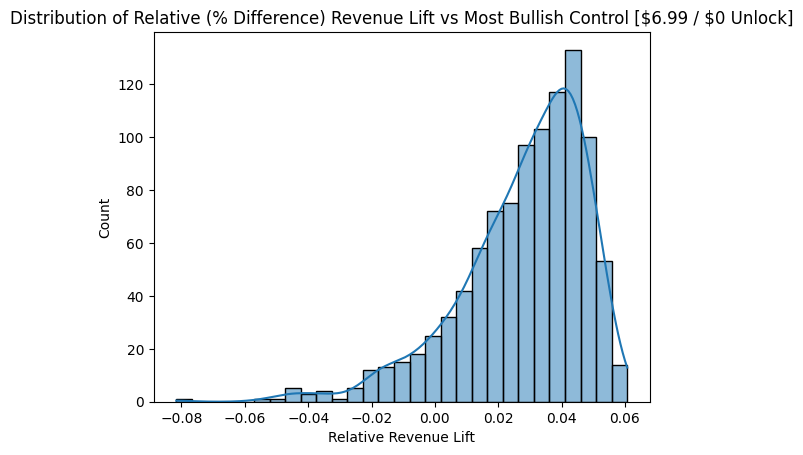

In [159]:
ax = sns.histplot(v2_699_iteration_revenue_summary_df['relative3_revenue_lift'], kde=True)
ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Most Bullish Control [\$6.99 / \$0 Unlock]')

plt.show()

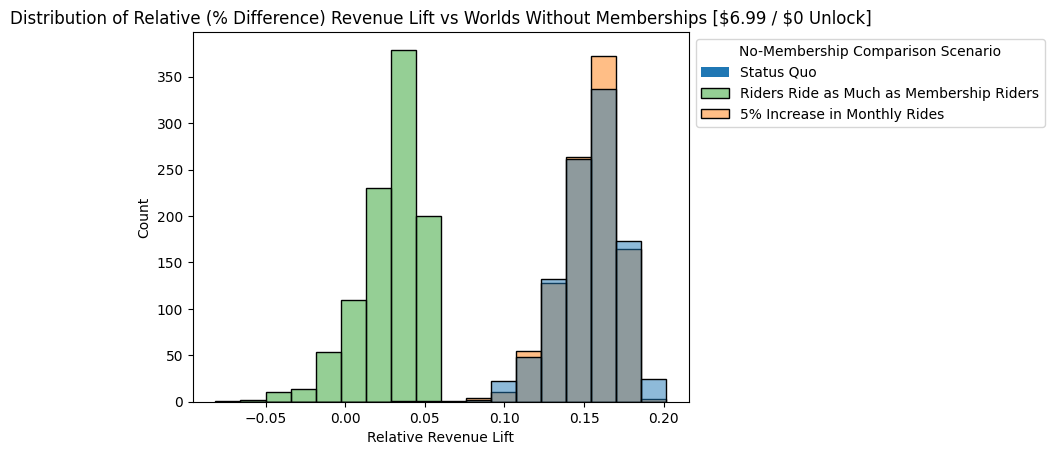

In [203]:
ax = sns.histplot([v2_699_iteration_revenue_summary_df['relative1_revenue_lift'], 
                   v2_699_iteration_revenue_summary_df['relative2_revenue_lift'], 
                   v2_699_iteration_revenue_summary_df['relative3_revenue_lift']])

ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Worlds Without Memberships [\$6.99 / \$0 Unlock]')
plt.legend(title="No-Membership Comparison Scenario",
          labels=["Status Quo", "Riders Ride as Much as Membership Riders", "5% Increase in Monthly Rides"],
          bbox_to_anchor=(1, 1))
plt.show()

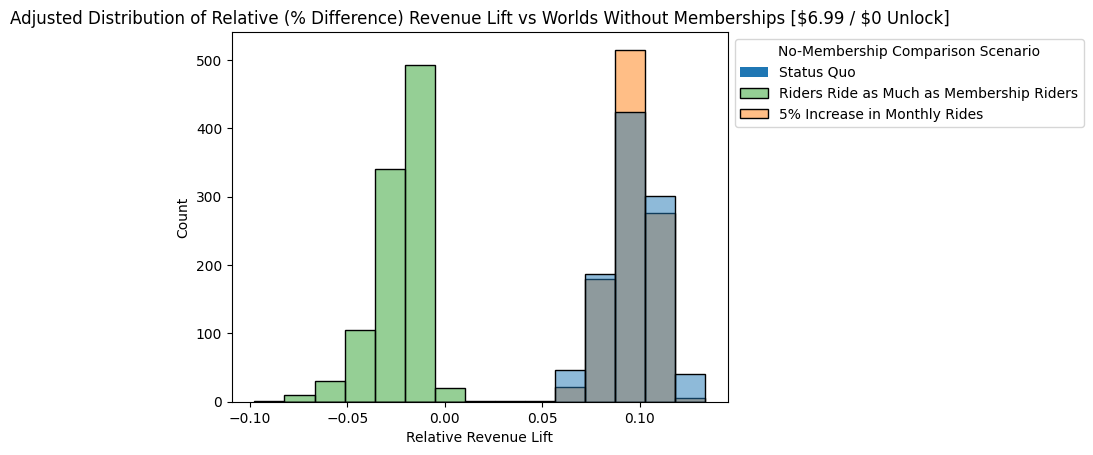

In [23]:
ax = sns.histplot([v2_699_iteration_revenue_summary_df['adj_relative1_revenue_lift'], 
                   v2_699_iteration_revenue_summary_df['adj_relative2_revenue_lift'], 
                   v2_699_iteration_revenue_summary_df['adj_relative3_revenue_lift']])

ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Adjusted Distribution of Relative (% Difference) Revenue Lift vs Worlds Without Memberships [\$6.99 / \$0 Unlock]')
plt.legend(title="No-Membership Comparison Scenario",
          labels=["Status Quo", "Riders Ride as Much as Membership Riders", "5% Increase in Monthly Rides"],
          bbox_to_anchor=(1, 1))
plt.show()

In [207]:
total_scenarios = v2_699_iteration_revenue_summary_df.shape[0]

In [209]:
# probablity we make more than a world without memberships
thresh = 0.0
revenue_atleast_breakeven_month0_count = v2_699_iteration_revenue_summary_df.loc[v2_699_iteration_revenue_summary_df['relative3_revenue_lift'] >= thresh].shape[0]

print("Probability we at least make as much as a world without memberships")
print(100 * (revenue_atleast_breakeven_month0_count / total_scenarios))

Probability we at least make as much as a world without memberships
90.4


In [105]:
# probablity we make at least 10% more than a world without memberships
thresh = 0.18
revenue_atleast_breakeven_month0_count = v2_699_iteration_revenue_summary_df.loc[v2_699_iteration_revenue_summary_df['relative_revenue_lift'] >= thresh].shape[0]

print("Probability we at least make 10% more than a world without memberships")
print(100 * (revenue_atleast_breakeven_month0_count / total_scenarios))

Probability we at least make 10% more than a world without memberships
81.85


In [64]:
# What can we point to as conditions for this?
complete_results_df = pd.merge(results_df, v2_699_iteration_revenue_summary_df, on='iteration', how='left')

In [106]:
complete_results_df['percentage_late_signups'] = complete_results_df['total_late_signups'] / complete_results_df['total_customers_month0']
complete_results_df['percentage_breakeven_riders'] = complete_results_df['num_customers_riding_over_breakeven'] / complete_results_df['total_customers_month0']

<Axes: xlabel='percentage_late_signups', ylabel='relative_revenue_lift'>

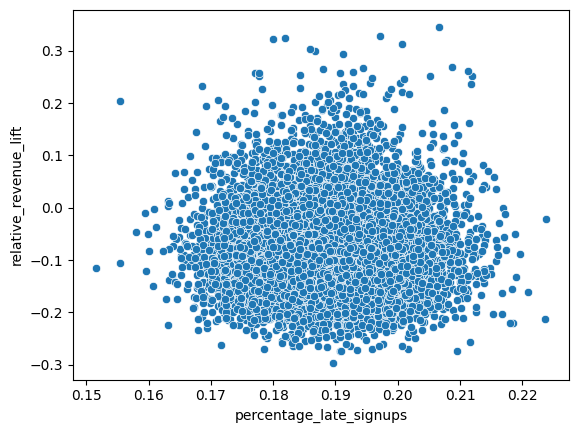

In [107]:
sns.scatterplot(data=complete_results_df, x='percentage_late_signups', y='relative_revenue_lift')

<Axes: xlabel='percentage_breakeven_riders', ylabel='relative_revenue_lift'>

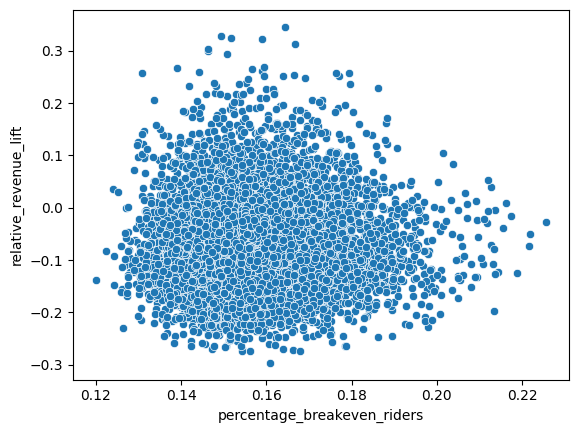

In [71]:
sns.scatterplot(data=complete_results_df, x='percentage_late_signups', y='relative_revenue_lift')

<Axes: xlabel='existing_customer_uptake_percentage_month0', ylabel='relative_revenue_lift'>

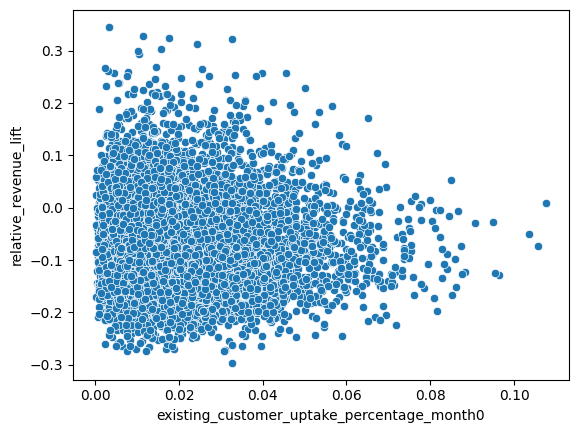

In [72]:
sns.scatterplot(data=complete_results_df, x='existing_customer_uptake_percentage_month0', y='relative_revenue_lift')

<Axes: xlabel='new_customer_uptake_percentage_month0', ylabel='relative_revenue_lift'>

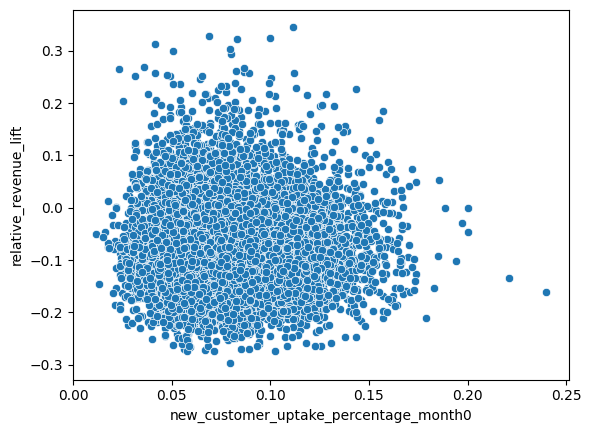

In [73]:
sns.scatterplot(data=complete_results_df, x='new_customer_uptake_percentage_month0', y='relative_revenue_lift')

<Axes: xlabel='new_signups_percentage_month0', ylabel='relative_revenue_lift'>

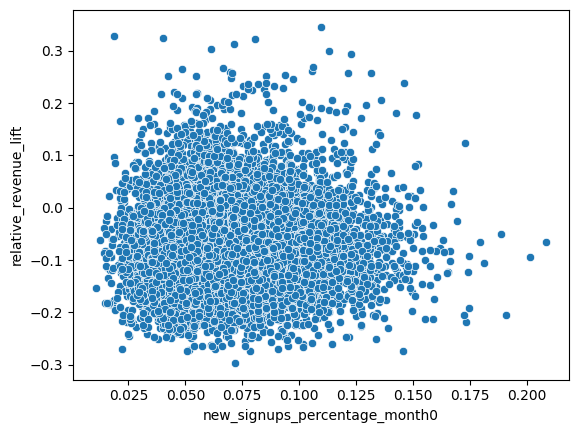

In [74]:
sns.scatterplot(data=complete_results_df, x='new_signups_percentage_month0', y='relative_revenue_lift')

<Axes: xlabel='percentage_breakeven_riders', ylabel='relative_revenue_lift'>

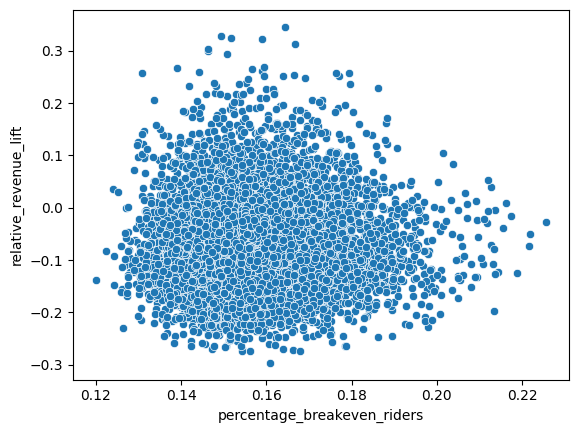

In [76]:
sns.scatterplot(data=complete_results_df, x='percentage_breakeven_riders', y='relative_revenue_lift')

# What about a $3.99 price point?

In [169]:
file_path = '/Users/tim.velasquez/Documents/product/exploration/pricing_risk_analysis/data/v2_3.99_price_results/'
file_pattern = '*m0_results.csv'
file_list = glob(file_path + file_pattern)

In [172]:
iteration_revenue_results_list = list()
iteration_counter = 0
for csv in file_list:
    results_df = pd.read_csv(csv)

    # revenue results

    control1_world_revenue = results_df.loc[:, 'total_control_ride_revenue'].sum()  # modeled control rides
    control2_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() # initial ride revenue taken
    control3_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() + results_df.loc[:, 'initial_membership_ride_revenue'].sum()  # a world where baseline includes the addiitional rides from a hypothetical membership
    
    standard_rider_revenue = results_df.loc[results_df.membership_signed_up==False, 'initial_standard_ride_revenue'].sum()
    
    subscription_revenue = results_df.membership_revenue.sum()
    early_membership_signup_revenue = results_df.loc[((results_df.existing_customer_late_signup==False) & (results_df.membership_signed_up==True)), 
                                        'adjusted_standard_ride_revenue'].sum()
    standard_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'initial_standard_ride_revenue'].sum()  # revenue from portion of their ride history where
    membership_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'adjusted_membership_ride_revenue'].sum()

    treatment_world_revenue = np.sum([subscription_revenue,
                                      standard_rider_revenue,
                                      early_membership_signup_revenue,
                                      standard_late_signup_revenue,
                                      membership_late_signup_revenue])

    # ride count results
    control1_world_rides_count = results_df.loc[:, 'rides_taken_control'].sum()
    control2_world_rides_count = results_df.loc[:, 'rides_taken'].sum()
    control3_world_rides_count = results_df.loc[:, 'total_rides_taken'].sum()
    # TODO: can we also include rides_taken_control?
    
    standard_rides_count = results_df.loc[results_df.membership_signed_up==False, 'total_rides_taken'].sum()
    early_membership_rides_count = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_rides_taken'].sum()

    standard_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()
    membership_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()

    treatment_world_rides_count = np.sum([standard_rides_count,
                                          early_membership_rides_count,
                                          standard_late_signup_rides_count,
                                          membership_late_signup_rides_count])

    # minutes
    total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].sum()
    
    total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].sum()
    early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].sum()
    standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].sum()
    membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].sum()

    # rider type properties
    avg_total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].mean()
    
    avg_total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].mean()
    avg_early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].mean()
    avg_standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].mean()
    avg_membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].mean()
    

    iteration_results_dict = {'iteration': iteration_counter,
                              'control1_world_revenue': control1_world_revenue,
                              'control2_world_revenue': control2_world_revenue,
                              'control3_world_revenue': control3_world_revenue,
                              'treatment_world_revenue': treatment_world_revenue,
                              'control1_world_rides_count': control1_world_rides_count,
                              'control2_world_rides_count': control2_world_rides_count,
                              'treatment_world_rides_count': treatment_world_rides_count,
                              'standard_rider_revenue': standard_rider_revenue,
                              'subscription_revenue': subscription_revenue,
                              'early_membership_signup_revenue': early_membership_signup_revenue,
                              'standard_late_signup_revenue': standard_late_signup_revenue,
                              'membership_late_signup_revenue': membership_late_signup_revenue,
                              'control_world_rides_count': control_world_rides_count,
                              'standard_rides_count': standard_rides_count,
                              'early_membership_rides_count': early_membership_rides_count,
                              'standard_late_signup_rides_count': standard_late_signup_rides_count,
                              'membership_late_signup_rides_count': membership_late_signup_rides_count,
                              'total_control_ride_minutes': total_control_ride_minutes,
                              'total_standard_ride_minutes': total_standard_ride_minutes,
                              'early_membership_ride_minutes': early_membership_ride_minutes,
                              'standard_late_signup_ride_minutes': standard_late_signup_ride_minutes,
                              'membership_late_signup_ride_minutes': membership_late_signup_ride_minutes,
                              'avg_total_control_ride_minutes': avg_total_control_ride_minutes,
                              'avg_total_standard_ride_minutes': avg_total_standard_ride_minutes,
                              'avg_early_membership_ride_minutes': avg_early_membership_ride_minutes,
                              'avg_standard_late_signup_ride_minutes': avg_standard_late_signup_ride_minutes,
                              'avg_membership_late_signup_ride_minutes': avg_membership_late_signup_ride_minutes
                             }

    iteration_revenue_results_list.append(iteration_results_dict)

    iteration_counter += 1

In [173]:
v2_399_iteration_revenue_summary_df = pd.DataFrame(iteration_revenue_results_list)
v2_399_iteration_revenue_summary_df.to_csv('data/v2_399_iteration_revenue_summary.csv', index=False)

In [174]:
v2_399_iteration_revenue_summary_df['absolute1_revenue_lift'] = v2_399_iteration_revenue_summary_df['treatment_world_revenue'] - v2_399_iteration_revenue_summary_df['control1_world_revenue']
v2_399_iteration_revenue_summary_df['absolute2_revenue_lift'] = v2_399_iteration_revenue_summary_df['treatment_world_revenue'] - v2_399_iteration_revenue_summary_df['control2_world_revenue']
v2_399_iteration_revenue_summary_df['absolute3_revenue_lift'] = v2_399_iteration_revenue_summary_df['treatment_world_revenue'] - v2_399_iteration_revenue_summary_df['control3_world_revenue']

v2_399_iteration_revenue_summary_df['relative1_revenue_lift'] = (v2_399_iteration_revenue_summary_df['treatment_world_revenue'] - v2_399_iteration_revenue_summary_df['control1_world_revenue']) / v2_399_iteration_revenue_summary_df['control1_world_revenue']
v2_399_iteration_revenue_summary_df['relative2_revenue_lift'] = (v2_399_iteration_revenue_summary_df['treatment_world_revenue'] - v2_399_iteration_revenue_summary_df['control2_world_revenue']) / v2_399_iteration_revenue_summary_df['control2_world_revenue']
v2_399_iteration_revenue_summary_df['relative3_revenue_lift'] = (v2_399_iteration_revenue_summary_df['treatment_world_revenue'] - v2_399_iteration_revenue_summary_df['control3_world_revenue']) / v2_399_iteration_revenue_summary_df['control3_world_revenue']

In [211]:
# probablity we make more than a world without memberships
thresh = 0.0
total_scenarios = v2_399_iteration_revenue_summary_df.shape[0]
revenue_atleast_breakeven_month0_count = v2_399_iteration_revenue_summary_df.loc[v2_399_iteration_revenue_summary_df['relative3_revenue_lift'] >= thresh].shape[0]

print("Probability we at least make as much as a world without memberships")
print(100 * (revenue_atleast_breakeven_month0_count / total_scenarios))

Probability we at least make as much as a world without memberships
96.3


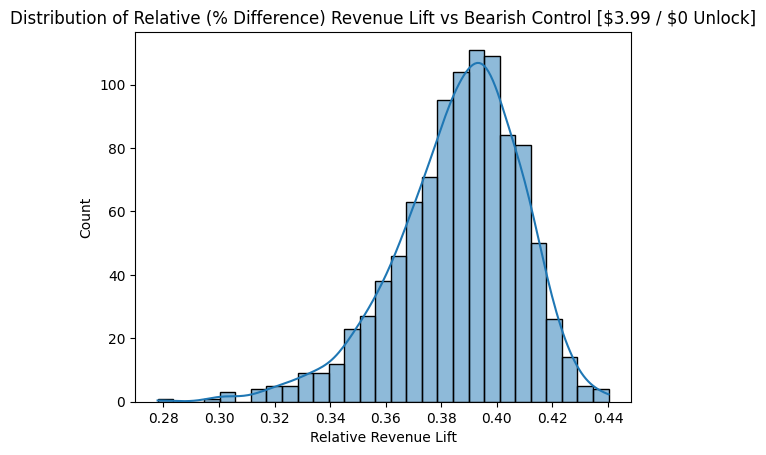

In [176]:
ax = sns.histplot(v2_399_iteration_revenue_summary_df['relative1_revenue_lift'], kde=True)
ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Bearish Control [\$3.99 / \$0 Unlock]')

plt.show()

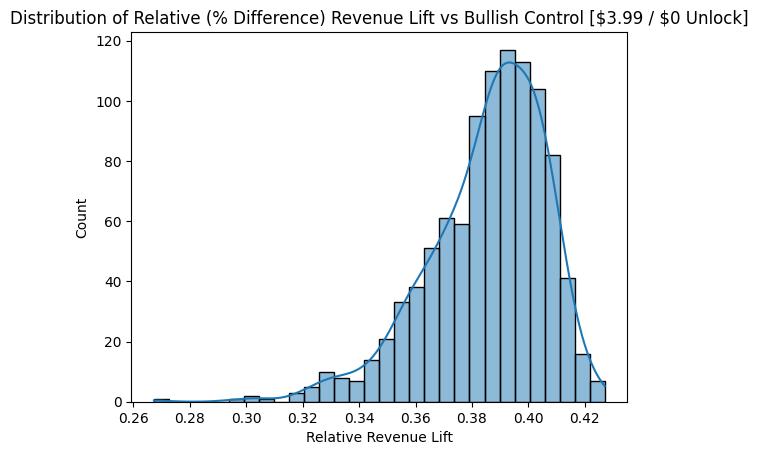

In [177]:
ax = sns.histplot(v2_399_iteration_revenue_summary_df['relative2_revenue_lift'], kde=True)
ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Bullish Control [\$3.99 / \$0 Unlock]')

plt.show()

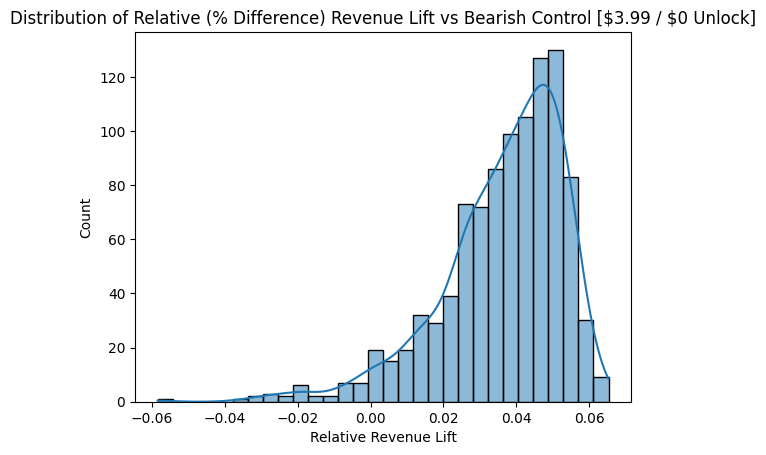

In [178]:
ax = sns.histplot(v2_399_iteration_revenue_summary_df['relative3_revenue_lift'], kde=True)
ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Bearish Control [\$3.99 / \$0 Unlock]')

plt.show()

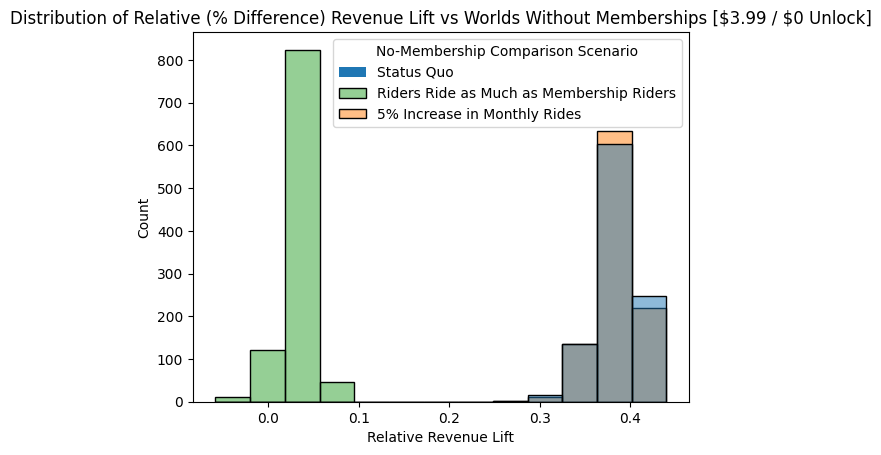

In [204]:
ax = sns.histplot([v2_399_iteration_revenue_summary_df['relative1_revenue_lift'], 
                   v2_399_iteration_revenue_summary_df['relative2_revenue_lift'], 
                   v2_399_iteration_revenue_summary_df['relative3_revenue_lift']])

ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Worlds Without Memberships [\$3.99 / \$0 Unlock]')
plt.legend(title="No-Membership Comparison Scenario",
          labels=["Status Quo", "Riders Ride as Much as Membership Riders", "5% Increase in Monthly Rides"],
          bbox_to_anchor=(1, 1))
plt.show()

In [214]:
np.median(v2_399_iteration_revenue_summary_df['relative3_revenue_lift'])

0.04003560553387118

# What about $0.99 price point?

In [181]:
file_path = '/Users/tim.velasquez/Documents/product/exploration/pricing_risk_analysis/data/v2_0.99_price_results/'
file_pattern = '*m0_results.csv'
file_list = glob(file_path + file_pattern)

In [182]:
iteration_revenue_results_list = list()
iteration_counter = 0
for csv in file_list:
    results_df = pd.read_csv(csv)

    # revenue results

    control1_world_revenue = results_df.loc[:, 'total_control_ride_revenue'].sum()  # modeled control rides
    control2_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() # initial ride revenue taken
    control3_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() + results_df.loc[:, 'initial_membership_ride_revenue'].sum()  # a world where baseline includes the addiitional rides from a hypothetical membership
    
    standard_rider_revenue = results_df.loc[results_df.membership_signed_up==False, 'initial_standard_ride_revenue'].sum()
    
    subscription_revenue = results_df.membership_revenue.sum()
    early_membership_signup_revenue = results_df.loc[((results_df.existing_customer_late_signup==False) & (results_df.membership_signed_up==True)), 
                                        'adjusted_standard_ride_revenue'].sum()
    standard_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'initial_standard_ride_revenue'].sum()  # revenue from portion of their ride history where
    membership_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'adjusted_membership_ride_revenue'].sum()

    treatment_world_revenue = np.sum([subscription_revenue,
                                      standard_rider_revenue,
                                      early_membership_signup_revenue,
                                      standard_late_signup_revenue,
                                      membership_late_signup_revenue])

    # ride count results
    control1_world_rides_count = results_df.loc[:, 'rides_taken_control'].sum()
    control2_world_rides_count = results_df.loc[:, 'rides_taken'].sum()
    control3_world_rides_count = results_df.loc[:, 'total_rides_taken'].sum()
    # TODO: can we also include rides_taken_control?
    
    standard_rides_count = results_df.loc[results_df.membership_signed_up==False, 'total_rides_taken'].sum()
    early_membership_rides_count = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_rides_taken'].sum()

    standard_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()
    membership_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()

    treatment_world_rides_count = np.sum([standard_rides_count,
                                          early_membership_rides_count,
                                          standard_late_signup_rides_count,
                                          membership_late_signup_rides_count])

    # minutes
    total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].sum()
    
    total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].sum()
    early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].sum()
    standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].sum()
    membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].sum()

    # rider type properties
    avg_total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].mean()
    
    avg_total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].mean()
    avg_early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].mean()
    avg_standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].mean()
    avg_membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].mean()
    

    iteration_results_dict = {'iteration': iteration_counter,
                              'control1_world_revenue': control1_world_revenue,
                              'control2_world_revenue': control2_world_revenue,
                              'control3_world_revenue': control3_world_revenue,
                              'treatment_world_revenue': treatment_world_revenue,
                              'control1_world_rides_count': control1_world_rides_count,
                              'control2_world_rides_count': control2_world_rides_count,
                              'treatment_world_rides_count': treatment_world_rides_count,
                              'standard_rider_revenue': standard_rider_revenue,
                              'subscription_revenue': subscription_revenue,
                              'early_membership_signup_revenue': early_membership_signup_revenue,
                              'standard_late_signup_revenue': standard_late_signup_revenue,
                              'membership_late_signup_revenue': membership_late_signup_revenue,
                              'control_world_rides_count': control_world_rides_count,
                              'standard_rides_count': standard_rides_count,
                              'early_membership_rides_count': early_membership_rides_count,
                              'standard_late_signup_rides_count': standard_late_signup_rides_count,
                              'membership_late_signup_rides_count': membership_late_signup_rides_count,
                              'total_control_ride_minutes': total_control_ride_minutes,
                              'total_standard_ride_minutes': total_standard_ride_minutes,
                              'early_membership_ride_minutes': early_membership_ride_minutes,
                              'standard_late_signup_ride_minutes': standard_late_signup_ride_minutes,
                              'membership_late_signup_ride_minutes': membership_late_signup_ride_minutes,
                              'avg_total_control_ride_minutes': avg_total_control_ride_minutes,
                              'avg_total_standard_ride_minutes': avg_total_standard_ride_minutes,
                              'avg_early_membership_ride_minutes': avg_early_membership_ride_minutes,
                              'avg_standard_late_signup_ride_minutes': avg_standard_late_signup_ride_minutes,
                              'avg_membership_late_signup_ride_minutes': avg_membership_late_signup_ride_minutes
                             }

    iteration_revenue_results_list.append(iteration_results_dict)

    iteration_counter += 1

In [183]:
v2_099_iteration_revenue_summary_df = pd.DataFrame(iteration_revenue_results_list)
v2_099_iteration_revenue_summary_df.to_csv('data/v2_099_iteration_revenue_summary.csv', index=False)

In [184]:
v2_099_iteration_revenue_summary_df['absolute1_revenue_lift'] = v2_099_iteration_revenue_summary_df['treatment_world_revenue'] - v2_099_iteration_revenue_summary_df['control1_world_revenue']
v2_099_iteration_revenue_summary_df['absolute2_revenue_lift'] = v2_099_iteration_revenue_summary_df['treatment_world_revenue'] - v2_099_iteration_revenue_summary_df['control2_world_revenue']
v2_099_iteration_revenue_summary_df['absolute3_revenue_lift'] = v2_099_iteration_revenue_summary_df['treatment_world_revenue'] - v2_099_iteration_revenue_summary_df['control3_world_revenue']

v2_099_iteration_revenue_summary_df['relative1_revenue_lift'] = (v2_099_iteration_revenue_summary_df['treatment_world_revenue'] - v2_099_iteration_revenue_summary_df['control1_world_revenue']) / v2_099_iteration_revenue_summary_df['control1_world_revenue']
v2_099_iteration_revenue_summary_df['relative2_revenue_lift'] = (v2_099_iteration_revenue_summary_df['treatment_world_revenue'] - v2_099_iteration_revenue_summary_df['control2_world_revenue']) / v2_099_iteration_revenue_summary_df['control2_world_revenue']
v2_099_iteration_revenue_summary_df['relative3_revenue_lift'] = (v2_099_iteration_revenue_summary_df['treatment_world_revenue'] - v2_099_iteration_revenue_summary_df['control3_world_revenue']) / v2_099_iteration_revenue_summary_df['control3_world_revenue']

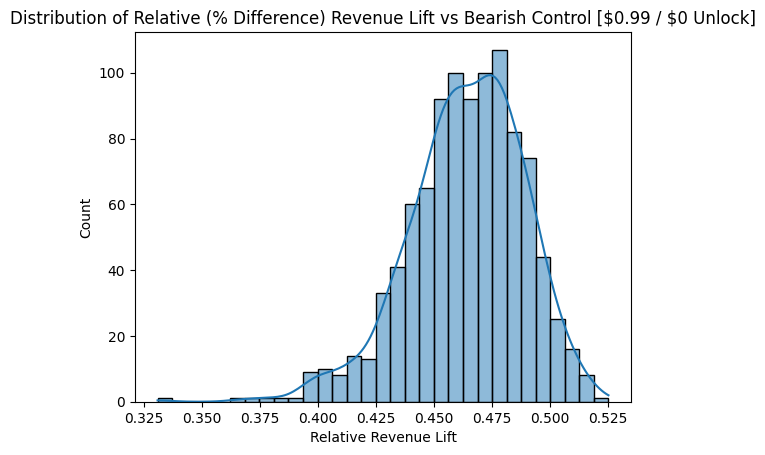

In [185]:
ax = sns.histplot(v2_099_iteration_revenue_summary_df['relative1_revenue_lift'], kde=True)
ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Bearish Control [\$0.99 / \$0 Unlock]')

plt.show()

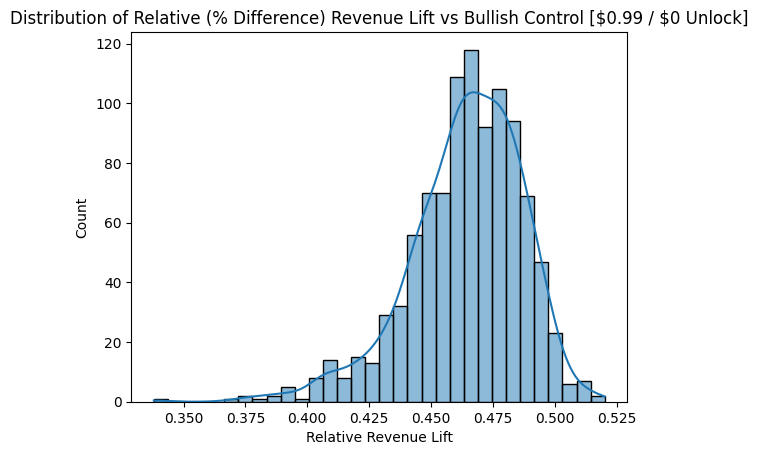

In [186]:
ax = sns.histplot(v2_099_iteration_revenue_summary_df['relative2_revenue_lift'], kde=True)
ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Bullish Control [\$0.99 / \$0 Unlock]')

plt.show()

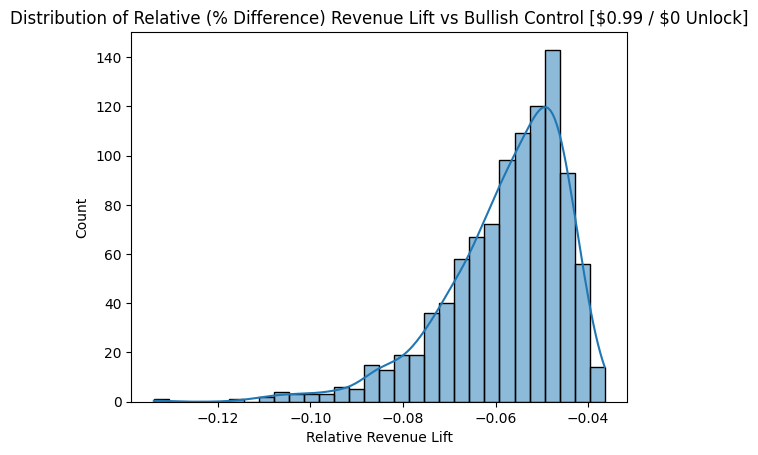

In [188]:
ax = sns.histplot(v2_099_iteration_revenue_summary_df['relative3_revenue_lift'], kde=True)
ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Bullish Control [\$0.99 / \$0 Unlock]')

plt.show()

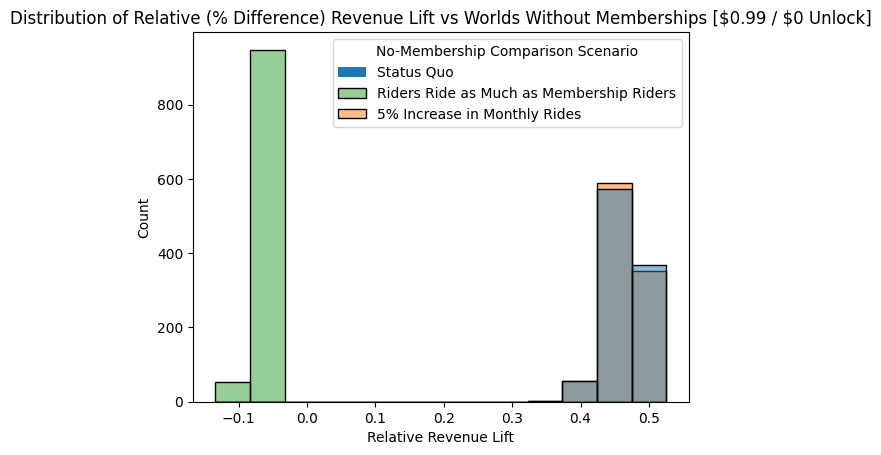

In [205]:
ax = sns.histplot([v2_099_iteration_revenue_summary_df['relative1_revenue_lift'], 
                   v2_099_iteration_revenue_summary_df['relative2_revenue_lift'], 
                   v2_099_iteration_revenue_summary_df['relative3_revenue_lift']])

ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Distribution of Relative (% Difference) Revenue Lift vs Worlds Without Memberships [\$0.99 / \$0 Unlock]')
plt.legend(title="No-Membership Comparison Scenario",
          labels=["Status Quo", "Riders Ride as Much as Membership Riders", "5% Increase in Monthly Rides"],
          bbox_to_anchor=(1, 1))
plt.show()

In [212]:
# probablity we make more than a world without memberships
thresh = 0.0
total_scenarios = v2_099_iteration_revenue_summary_df.shape[0]
revenue_atleast_breakeven_month0_count = v2_099_iteration_revenue_summary_df.loc[v2_099_iteration_revenue_summary_df['relative3_revenue_lift'] >= thresh].shape[0]

print("Probability we at least make as much as a world without memberships")
print(100 * (revenue_atleast_breakeven_month0_count / total_scenarios))

Probability we at least make as much as a world without memberships
0.0


In [213]:
np.median(v2_099_iteration_revenue_summary_df['relative3_revenue_lift'])

-0.055048013324999825

<Axes: ylabel='Count'>

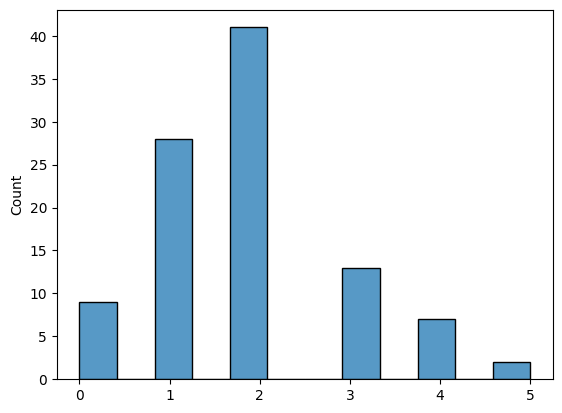

In [206]:
sns.histplot(np.random.poisson(1.8, size=100))

# Focusing back on the $6.99 plan

In [222]:
iteration_summary_df = pd.read_csv('./data/v2_6.99_price_iteration_results_summary.csv')
revenue_summary_df = pd.read_csv('./data/v2_699_iteration_revenue_summary.csv')

In [223]:
joined_df = pd.merge(iteration_summary_df, 
                     revenue_summary_df, 
                     on='iteration', 
                     how='left')

In [224]:
joined_df.head()

,iteration,mau_month0,total_customers_month0,new_signups_percentage_month0,existing_customer_uptake_percentage_month0,total_late_signups,new_customer_uptake_percentage_month0,probability_membership_new_signup_active_next_month0,probabillity_membership_existing_active_next_month0,probability_standard_active_next_month0,counterfactual_ride_revenue_month0,counterfactual_number_rides_taken_month0,total_membership_revenue_month0,treatment_world_number_rides_taken_month0,num_customers_riding_over_breakeven,total_membership_revenue_riders_over_breakeven,total_standard_revenue_riders_over_breakeven,total_membership_ride_mintues_riders_over_breakeven,total_standard_ride_mintues_riders_over_breakeven,num_membership_rides_riders_over_breakeven,num_standard_rides_riders_over_breakeven,control1_world_revenue,control2_world_revenue,control3_world_revenue,treatment_world_revenue,control1_world_rides_count,control2_world_rides_count,treatment_world_rides_count,standard_rider_revenue,subscription_revenue,early_membership_signup_revenue,standard_late_signup_revenue,membership_late_signup_revenue,control_world_rides_count,standard_rides_count,early_membership_rides_count,standard_late_signup_rides_count,membership_late_signup_rides_count,total_control_ride_minutes,total_standard_ride_minutes,early_membership_ride_minutes,standard_late_signup_ride_minutes,membership_late_signup_ride_minutes,avg_total_control_ride_minutes,avg_total_standard_ride_minutes,avg_early_membership_ride_minutes,avg_standard_late_signup_ride_minutes,avg_membership_late_signup_ride_minutes,relative1_revenue_lift,relative2_revenue_lift,relative3_revenue_lift,relative1_ride_count_lift
0,0,2076,2276,0.096619,0.035280,407,0.061807,0.674014,0.559035,0.237914,32879.453932,6983,16831.912053,7378,348,2878.101021,0.0,7379.746207,0.0,2998,0,30764.788765,30796.373282,34613.104532,36211.558183,6501,6628,10547,18464.658832,3026.67,0.0,11890.573120,2829.656232,6794,3893,0,3327,3327,62214.842988,37363.227774,0.0,24045.059282,7255.528799,30.617541,23.783086,NaN,55.531315,16.756418,0.177046,0.175838,0.046181,0.552399
1,1,2062,2180,0.057639,0.013045,418,0.045674,0.463981,0.536290,0.243736,32591.170172,6798,17087.588344,6939,326,2634.364710,0.0,6754.781307,0.0,2777,0,30735.876134,30674.844707,34882.086917,35045.217442,6499,6851,10060,18187.276562,2879.88,0.0,11232.150725,2745.910155,6794,3874,0,3093,3093,62145.836242,36700.709134,0.0,22782.437755,7040.795269,30.007647,23.243008,NaN,55.297179,17.089309,0.140206,0.142474,0.004677,0.480718
2,2,1858,2006,0.079907,0.004085,363,0.113403,0.531201,0.556524,0.188858,29144.624234,6106,14783.796710,6195,270,2118.701582,0.0,5432.568160,0.0,2244,0,27838.495762,27436.769298,30533.026368,32120.889315,5847,5897,9126,17750.248551,2460.48,0.0,9550.229155,2359.931608,6794,3776,0,2675,2675,56388.450672,35831.406541,0.0,19256.997834,6051.106688,30.202705,23.824073,NaN,54.707380,17.190644,0.153830,0.170724,0.052005,0.343244
3,3,2078,2226,0.071254,0.017934,472,0.069216,0.460365,0.516959,0.061959,33723.244642,7148,19399.572145,7360,393,3010.190420,0.0,7718.436975,0.0,3280,0,29495.286680,29509.364753,32992.746261,33480.741641,6248,6538,9416,18548.140802,2579.31,0.0,10024.509715,2328.781124,6794,3948,0,2734,2734,59608.427386,37436.258467,0.0,20293.614654,5971.233651,29.392716,23.441615,NaN,54.996246,16.182205,0.135122,0.134580,0.014791,0.385929
4,4,1905,2043,0.072715,0.029984,391,0.072083,0.579013,0.588459,0.167933,30279.560198,6350,16067.210587,6634,324,2716.604231,0.0,6965.651873,0.0,2753,0,33130.186441,32323.235232,36654.441212,36905.222792,6884,7340,10651,19485.238939,3040.65,0.0,11533.622845,2845.711008,6794,4137,0,3257,3257,67297.913951,39354.458817,0.0,23229.802167,7296.694892,30.465330,23.425273,NaN,53.401844,16.774011,0.113946,0.141755,0.006842,0.567707


In [225]:
joined_df['percent_late_signup_customers'] = joined_df['total_late_signups'] / joined_df['total_customers_month0']

In [228]:
list(joined_df.columns)

['iteration',
 'mau_month0',
 'total_customers_month0',
 'new_signups_percentage_month0',
 'existing_customer_uptake_percentage_month0',
 'total_late_signups',
 'new_customer_uptake_percentage_month0',
 'probability_membership_new_signup_active_next_month0',
 'probabillity_membership_existing_active_next_month0',
 'probability_standard_active_next_month0',
 'counterfactual_ride_revenue_month0',
 'counterfactual_number_rides_taken_month0',
 'total_membership_revenue_month0',
 'treatment_world_number_rides_taken_month0',
 'num_customers_riding_over_breakeven',
 'total_membership_revenue_riders_over_breakeven',
 'total_standard_revenue_riders_over_breakeven',
 'total_membership_ride_mintues_riders_over_breakeven',
 'total_standard_ride_mintues_riders_over_breakeven',
 'num_membership_rides_riders_over_breakeven',
 'num_standard_rides_riders_over_breakeven',
 'control1_world_revenue',
 'control2_world_revenue',
 'control3_world_revenue',
 'treatment_world_revenue',
 'control1_world_rides_c

<Axes: xlabel='percent_late_signup_customers', ylabel='relative1_revenue_lift'>

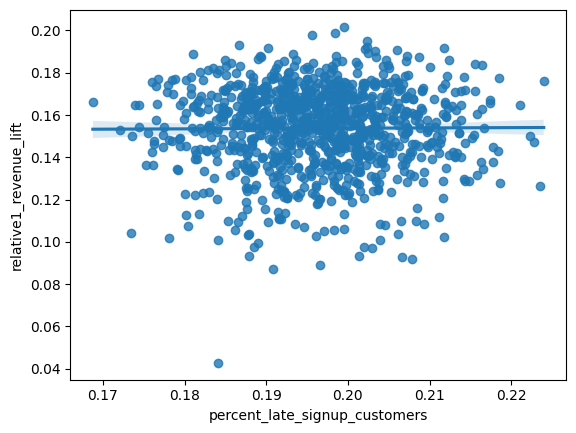

In [226]:
sns.regplot(x=joined_df['percent_late_signup_customers'],
            y=joined_df['relative1_revenue_lift'])

In [233]:
standard_rides = joined_df['standard_rides_count'] + joined_df['standard_late_signup_rides_count']
membership_rides = joined_df['membership_late_signup_rides_count'] + joined_df['early_membership_rides_count']

standard_to_membership_rides_ratio = standard_rides / membership_rides
membership_to_standard_rides_ratio = membership_rides / standard_rides

[Text(0.5, 1.0, 'Relative Revenue Lift (Memberships vs Historical Control) vs Standard Rides : Membership Rides Ratio'),
 Text(0.5, 0, 'Standard Rides : Membership Rides Ratio'),
 Text(0, 0.5, 'Relative Revenue Lift (% Difference)')]

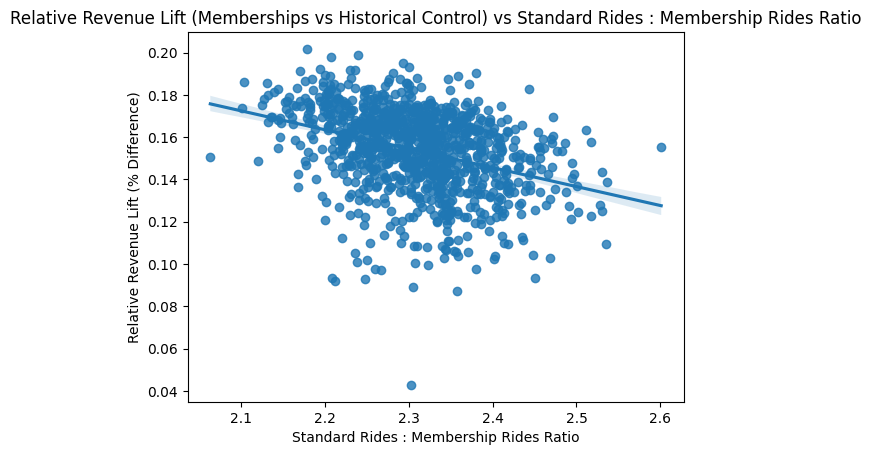

In [235]:
ax = sns.regplot(x=standard_to_membership_rides_ratio,
               y=joined_df['relative1_revenue_lift'])

ax.set(title='Relative Revenue Lift (Memberships vs Historical Control) vs Standard Rides : Membership Rides Ratio',
       xlabel='Standard Rides : Membership Rides Ratio',
       ylabel='Relative Revenue Lift (% Difference)')

<Axes: ylabel='relative1_revenue_lift'>

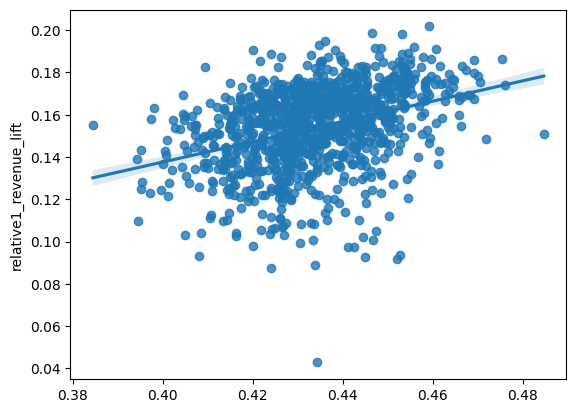

In [234]:
sns.regplot(x=membership_to_standard_rides_ratio,
               y=joined_df['relative1_revenue_lift'])

In [242]:
joined_df['percentage_subscription_revenue'] = joined_df['subscription_revenue'] / joined_df['treatment_world_revenue']

[Text(0.5, 1.0, 'Relative Revenue Lift (vs Historical Control) vs Subscription Revenue Percentage'),
 Text(0.5, 0, 'Subscription Revenue Percentage [1e2]'),
 Text(0, 0.5, 'Relative Revenue Lift (% Difference)')]

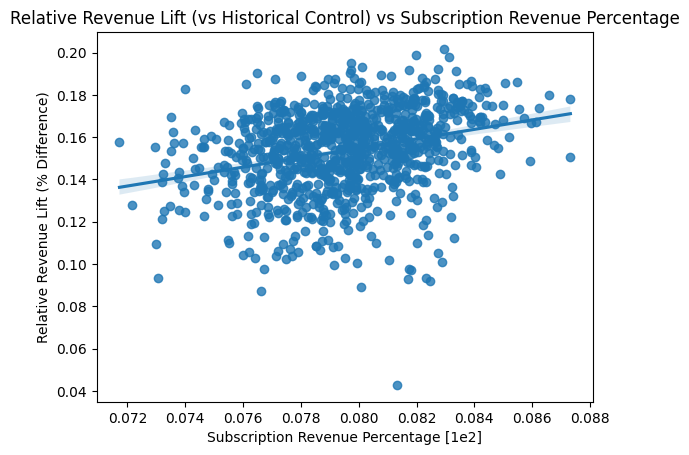

In [245]:
ax = sns.regplot(x=joined_df['percentage_subscription_revenue'],
                 y=joined_df['relative1_revenue_lift'])

ax.set(title='Relative Revenue Lift (vs Historical Control) vs Subscription Revenue Percentage',
       xlabel='Subscription Revenue Percentage [1e2]',
       ylabel='Relative Revenue Lift (% Difference)')

In [246]:
# Are we still making more money even if we remove the subscription fee?
treatment_revenue_wo_subscription = joined_df['treatment_world_revenue'] - joined_df['subscription_revenue']

In [252]:
test_lift = (treatment_revenue_wo_subscription - control1_world_revenue) / control1_world_revenue

[Text(0.5, 1.0, 'Relative Revenue [Absence of $6.99 monthly fee] Lift (vs Historical Control) vs Subscription Revenue Percentage'),
 Text(0.5, 0, 'Relative Lift % (1e2)'),
 Text(0, 0.5, 'Count')]

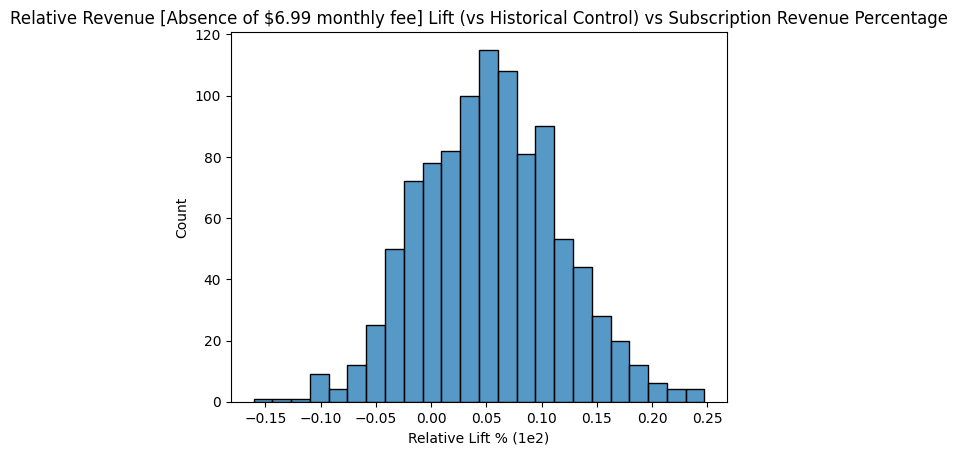

In [254]:
ax = sns.histplot(test_lift)

ax.set(title='Relative Revenue [Absence of $6.99 monthly fee] Lift (vs Historical Control) vs Subscription Revenue Percentage',
       xlabel='Relative Lift % (1e2)',
       ylabel='Count')

In [250]:
test_lift[test_lift<0].size

199

In [251]:
test_lift.size

1000

In [ ]:
# TODO: For riders that were late signups, is the ride revenue from the additional rides greater than or equal to the subscription fee

In [255]:
file_path = '/Users/tim.velasquez/Documents/product/exploration/pricing_risk_analysis/data/v2_6.99_price_results/'
file_pattern = '*m0_results.csv'
file_list = glob(file_path + file_pattern)

In [262]:
late_signups_iteration_revenue_results_list = list()
iteration_counter = 0
for csv in file_list:
    results_df = pd.read_csv(csv)

    results_df = results_df.loc[results_df['existing_customer_late_signup']==True]

    # revenue results

    control1_world_revenue = results_df.loc[:, 'total_control_ride_revenue'].sum()  # modeled control rides
    control2_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() # initial ride revenue taken
    control3_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() + results_df.loc[:, 'initial_membership_ride_revenue'].sum()  # a world where baseline includes the addiitional rides from a hypothetical membership
    
    standard_rider_revenue = results_df.loc[results_df.membership_signed_up==False, 'initial_standard_ride_revenue'].sum()
    
    subscription_revenue = results_df.membership_revenue.sum()
    early_membership_signup_revenue = results_df.loc[((results_df.existing_customer_late_signup==False) & (results_df.membership_signed_up==True)), 
                                        'adjusted_standard_ride_revenue'].sum()
    standard_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'initial_standard_ride_revenue'].sum()  # revenue from portion of their ride history where
    membership_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'adjusted_membership_ride_revenue'].sum()

    treatment_world_revenue = np.sum([subscription_revenue,
                                      standard_rider_revenue,
                                      early_membership_signup_revenue,
                                      standard_late_signup_revenue,
                                      membership_late_signup_revenue])

    # ride count results
    control1_world_rides_count = results_df.loc[:, 'rides_taken_control'].sum()
    control2_world_rides_count = results_df.loc[:, 'rides_taken'].sum()
    control3_world_rides_count = results_df.loc[:, 'total_rides_taken'].sum()
    # TODO: can we also include rides_taken_control?
    
    standard_rides_count = results_df.loc[results_df.membership_signed_up==False, 'total_rides_taken'].sum()
    early_membership_rides_count = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_rides_taken'].sum()

    standard_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()
    membership_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()

    treatment_world_rides_count = np.sum([standard_rides_count,
                                          early_membership_rides_count,
                                          standard_late_signup_rides_count,
                                          membership_late_signup_rides_count])

    # minutes
    total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].sum()
    
    total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].sum()
    early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].sum()
    standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].sum()
    membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].sum()

    # rider type properties
    avg_total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].mean()
    
    avg_total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].mean()
    avg_early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].mean()
    avg_standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].mean()
    avg_membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].mean()
    

    iteration_results_dict = {'iteration': iteration_counter,
                              'control1_world_revenue': control1_world_revenue,
                              'control2_world_revenue': control2_world_revenue,
                              'control3_world_revenue': control3_world_revenue,
                              'treatment_world_revenue': treatment_world_revenue,
                              'control1_world_rides_count': control1_world_rides_count,
                              'control2_world_rides_count': control2_world_rides_count,
                              'treatment_world_rides_count': treatment_world_rides_count,
                              'standard_rider_revenue': standard_rider_revenue,
                              'subscription_revenue': subscription_revenue,
                              'early_membership_signup_revenue': early_membership_signup_revenue,
                              'standard_late_signup_revenue': standard_late_signup_revenue,
                              'membership_late_signup_revenue': membership_late_signup_revenue,
                              'control_world_rides_count': control_world_rides_count,
                              'standard_rides_count': standard_rides_count,
                              'early_membership_rides_count': early_membership_rides_count,
                              'standard_late_signup_rides_count': standard_late_signup_rides_count,
                              'membership_late_signup_rides_count': membership_late_signup_rides_count,
                              'total_control_ride_minutes': total_control_ride_minutes,
                              'total_standard_ride_minutes': total_standard_ride_minutes,
                              'early_membership_ride_minutes': early_membership_ride_minutes,
                              'standard_late_signup_ride_minutes': standard_late_signup_ride_minutes,
                              'membership_late_signup_ride_minutes': membership_late_signup_ride_minutes,
                              'avg_total_control_ride_minutes': avg_total_control_ride_minutes,
                              'avg_total_standard_ride_minutes': avg_total_standard_ride_minutes,
                              'avg_early_membership_ride_minutes': avg_early_membership_ride_minutes,
                              'avg_standard_late_signup_ride_minutes': avg_standard_late_signup_ride_minutes,
                              'avg_membership_late_signup_ride_minutes': avg_membership_late_signup_ride_minutes
                             }

    late_signups_iteration_revenue_results_list.append(iteration_results_dict)

    iteration_counter += 1

In [263]:
late_signups_iteration_revenue_results_df = pd.DataFrame(late_signups_iteration_revenue_results_list)

In [266]:
test_lift = late_signups_iteration_revenue_results_df['subscription_revenue'] - late_signups_iteration_revenue_results_df['membership_late_signup_revenue']

[Text(0.5, 1.0, 'Absolute Difference ($ USD) Between Subscription Revenue and Additional Membership Ride Revenue Among Late Signups'),
 Text(0.5, 0, 'Revenue Difference $')]

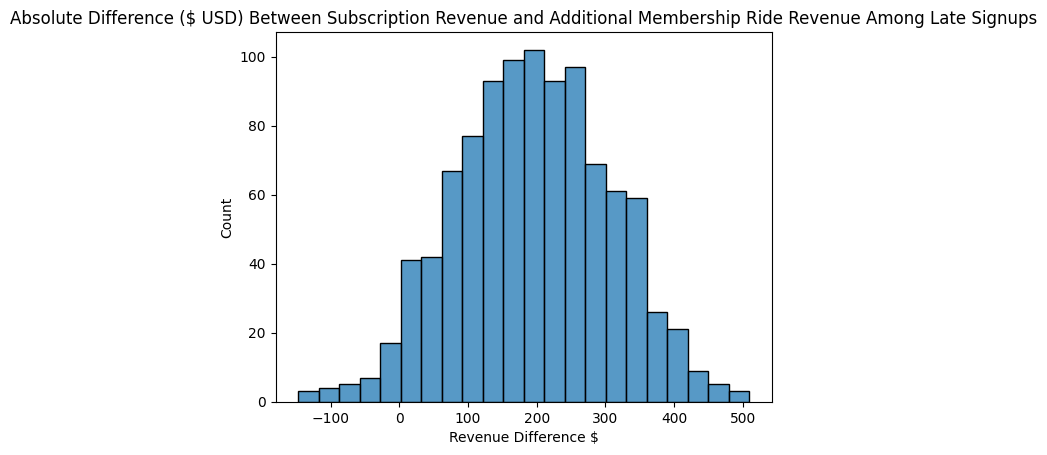

In [271]:
ax = sns.histplot(test_lift)

ax.set(title='Absolute Difference ($ USD) Between Subscription Revenue and Additional Membership Ride Revenue Among Late Signups',
       xlabel='Revenue Difference $')

In [ ]:
# What does it mean if Additional Rides Rev > Subscription Rev?
# What does it mean if Additional Rides Rev < Subscription Rev?
# What does it mean if Additional Rides Rev = Subscription Rev?

## What about $5.99?

In [24]:
file_path = '/Users/tim.velasquez/Documents/product/exploration/pricing_risk_analysis/data/v2_5.99_price_results/'
file_pattern = '*m0_results.csv'
file_list = glob(file_path + file_pattern)

In [25]:
iteration_revenue_results_list = list()
iteration_counter = 0
BREAKEVEN_RIDES = 6
for csv in file_list:
    results_df = pd.read_csv(csv)

    # revenue results

    control1_world_revenue = results_df.loc[:, 'total_control_ride_revenue'].sum()  # modeled control rides
    control2_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() # initial ride revenue taken
    control3_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() + results_df.loc[:, 'initial_membership_ride_revenue'].sum()  # a world where baseline includes the addiitional rides from a hypothetical membership
    
    standard_rider_revenue = results_df.loc[results_df.membership_signed_up==False, 'initial_standard_ride_revenue'].sum()
    
    subscription_revenue = results_df.membership_revenue.sum()
    early_membership_signup_revenue = results_df.loc[((results_df.existing_customer_late_signup==False) & (results_df.membership_signed_up==True)), 
                                        'adjusted_standard_ride_revenue'].sum()
    standard_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'initial_standard_ride_revenue'].sum()  # revenue from portion of their ride history where
    membership_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'adjusted_membership_ride_revenue'].sum()

    late_signup_unused_membership_revenue = np.sum(results_df.loc[results_df.existing_customer_late_signup==True, 'membership_revenue'] - results_df.loc[( (results_df.existing_customer_late_signup==True) & 
                                                                                                                                                   (results_df.additional_rides_taken < BREAKEVEN_RIDES)), 'additional_rides_taken'])
    
    early_signup_unused_membership_revenue = np.sum(results_df.loc[( (results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup!=True) ), 'membership_revenue'] - results_df.loc[( ((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup!=True)) ) & 
                                                                                                                                                                                               (results_df.total_rides_taken < BREAKEVEN_RIDES), 'total_rides_taken'])
    
    treatment_world_revenue = np.sum([subscription_revenue,
                                      standard_rider_revenue,
                                      early_membership_signup_revenue,
                                      standard_late_signup_revenue,
                                      membership_late_signup_revenue])

    adjusted_treatment_world_revenue = treatment_world_revenue - np.sum([late_signup_unused_membership_revenue,
                                                                         early_signup_unused_membership_revenue])

    # ride count results
    control1_world_rides_count = results_df.loc[:, 'rides_taken_control'].sum()
    control2_world_rides_count = results_df.loc[:, 'rides_taken'].sum()
    control3_world_rides_count = results_df.loc[:, 'total_rides_taken'].sum()
    # TODO: can we also include rides_taken_control?
    
    standard_rides_count = results_df.loc[results_df.membership_signed_up==False, 'total_rides_taken'].sum()
    early_membership_rides_count = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_rides_taken'].sum()

    standard_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()
    membership_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()

    treatment_world_rides_count = np.sum([standard_rides_count,
                                          early_membership_rides_count,
                                          standard_late_signup_rides_count,
                                          membership_late_signup_rides_count])

    # minutes
    total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].sum()
    
    total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].sum()
    early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].sum()
    standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].sum()
    membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].sum()

    # rider type properties
    avg_total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].mean()
    
    avg_total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].mean()
    avg_early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].mean()
    avg_standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].mean()
    avg_membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].mean()
    

    iteration_results_dict = {'iteration': iteration_counter,
                              'control1_world_revenue': control1_world_revenue,
                              'control2_world_revenue': control2_world_revenue,
                              'control3_world_revenue': control3_world_revenue,
                              'treatment_world_revenue': treatment_world_revenue,
                              'adjusted_treatment_world_revenue': adjusted_treatment_world_revenue,
                              'control1_world_rides_count': control1_world_rides_count,
                              'control2_world_rides_count': control2_world_rides_count,
                              'treatment_world_rides_count': treatment_world_rides_count,
                              'standard_rider_revenue': standard_rider_revenue,
                              'subscription_revenue': subscription_revenue,
                              'early_membership_signup_revenue': early_membership_signup_revenue,
                              'standard_late_signup_revenue': standard_late_signup_revenue,
                              'membership_late_signup_revenue': membership_late_signup_revenue,
                              'late_signup_unused_membership_revenue': late_signup_unused_membership_revenue,
                              'early_signup_unused_membership_revenue': early_signup_unused_membership_revenue,
                              'standard_rides_count': standard_rides_count,
                              'early_membership_rides_count': early_membership_rides_count,
                              'standard_late_signup_rides_count': standard_late_signup_rides_count,
                              'membership_late_signup_rides_count': membership_late_signup_rides_count,
                              'total_control_ride_minutes': total_control_ride_minutes,
                              'total_standard_ride_minutes': total_standard_ride_minutes,
                              'early_membership_ride_minutes': early_membership_ride_minutes,
                              'standard_late_signup_ride_minutes': standard_late_signup_ride_minutes,
                              'membership_late_signup_ride_minutes': membership_late_signup_ride_minutes,
                              'avg_total_control_ride_minutes': avg_total_control_ride_minutes,
                              'avg_total_standard_ride_minutes': avg_total_standard_ride_minutes,
                              'avg_early_membership_ride_minutes': avg_early_membership_ride_minutes,
                              'avg_standard_late_signup_ride_minutes': avg_standard_late_signup_ride_minutes,
                              'avg_membership_late_signup_ride_minutes': avg_membership_late_signup_ride_minutes}

    iteration_revenue_results_list.append(iteration_results_dict)

    iteration_counter += 1

In [27]:
v2_599_iteration_revenue_summary_df = pd.DataFrame(iteration_revenue_results_list)

In [28]:
v2_599_iteration_revenue_summary_df['relative1_revenue_lift'] = (v2_599_iteration_revenue_summary_df['treatment_world_revenue'] - v2_599_iteration_revenue_summary_df['control1_world_revenue']) / v2_599_iteration_revenue_summary_df['control1_world_revenue']
v2_599_iteration_revenue_summary_df['relative2_revenue_lift'] = (v2_599_iteration_revenue_summary_df['treatment_world_revenue'] - v2_599_iteration_revenue_summary_df['control2_world_revenue']) / v2_599_iteration_revenue_summary_df['control2_world_revenue']
v2_599_iteration_revenue_summary_df['relative3_revenue_lift'] = (v2_599_iteration_revenue_summary_df['treatment_world_revenue'] - v2_599_iteration_revenue_summary_df['control3_world_revenue']) / v2_599_iteration_revenue_summary_df['control3_world_revenue']

v2_599_iteration_revenue_summary_df['adj_relative1_revenue_lift'] = (v2_599_iteration_revenue_summary_df['adjusted_treatment_world_revenue'] - v2_599_iteration_revenue_summary_df['control1_world_revenue']) / v2_599_iteration_revenue_summary_df['control1_world_revenue']
v2_599_iteration_revenue_summary_df['adj_relative2_revenue_lift'] = (v2_599_iteration_revenue_summary_df['adjusted_treatment_world_revenue'] - v2_599_iteration_revenue_summary_df['control2_world_revenue']) / v2_599_iteration_revenue_summary_df['control2_world_revenue']
v2_599_iteration_revenue_summary_df['adj_relative3_revenue_lift'] = (v2_599_iteration_revenue_summary_df['adjusted_treatment_world_revenue'] - v2_599_iteration_revenue_summary_df['control3_world_revenue']) / v2_599_iteration_revenue_summary_df['control3_world_revenue']



In [29]:
v2_599_iteration_revenue_summary_df.to_csv('data/v2_599_iteration_revenue_summary.csv', index=False)

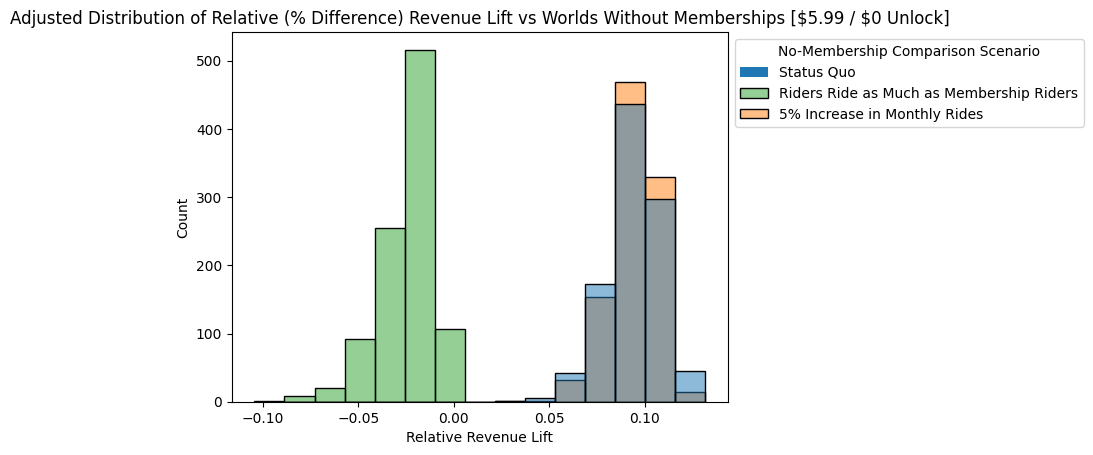

In [30]:
ax = sns.histplot([v2_599_iteration_revenue_summary_df['adj_relative1_revenue_lift'], 
                   v2_599_iteration_revenue_summary_df['adj_relative2_revenue_lift'], 
                   v2_599_iteration_revenue_summary_df['adj_relative3_revenue_lift']])

ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Adjusted Distribution of Relative (% Difference) Revenue Lift vs Worlds Without Memberships [\$5.99 / \$0 Unlock]')
plt.legend(title="No-Membership Comparison Scenario",
          labels=["Status Quo", "Riders Ride as Much as Membership Riders", "5% Increase in Monthly Rides"],
          bbox_to_anchor=(1, 1))
plt.show()

## What about $4.99?

In [31]:
file_path = '/Users/tim.velasquez/Documents/product/exploration/pricing_risk_analysis/data/v2_4.99_price_results/'
file_pattern = '*m0_results.csv'
file_list = glob(file_path + file_pattern)

In [32]:
iteration_revenue_results_list = list()
iteration_counter = 0
BREAKEVEN_RIDES = 5
for csv in file_list:
    results_df = pd.read_csv(csv)

    # revenue results

    control1_world_revenue = results_df.loc[:, 'total_control_ride_revenue'].sum()  # modeled control rides
    control2_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() # initial ride revenue taken
    control3_world_revenue = results_df.loc[:, 'initial_standard_ride_revenue'].sum() + results_df.loc[:, 'initial_membership_ride_revenue'].sum()  # a world where baseline includes the addiitional rides from a hypothetical membership
    
    standard_rider_revenue = results_df.loc[results_df.membership_signed_up==False, 'initial_standard_ride_revenue'].sum()
    
    subscription_revenue = results_df.membership_revenue.sum()
    early_membership_signup_revenue = results_df.loc[((results_df.existing_customer_late_signup==False) & (results_df.membership_signed_up==True)), 
                                        'adjusted_standard_ride_revenue'].sum()
    standard_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'initial_standard_ride_revenue'].sum()  # revenue from portion of their ride history where
    membership_late_signup_revenue = results_df.loc[results_df.existing_customer_late_signup==True, 'adjusted_membership_ride_revenue'].sum()

    late_signup_unused_membership_revenue = np.sum(results_df.loc[results_df.existing_customer_late_signup==True, 'membership_revenue'] - results_df.loc[( (results_df.existing_customer_late_signup==True) & 
                                                                                                                                                   (results_df.additional_rides_taken < BREAKEVEN_RIDES)), 'additional_rides_taken'])
    
    early_signup_unused_membership_revenue = np.sum(results_df.loc[( (results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup!=True) ), 'membership_revenue'] - results_df.loc[( ((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup!=True)) ) & 
                                                                                                                                                                                               (results_df.total_rides_taken < BREAKEVEN_RIDES), 'total_rides_taken'])
    
    treatment_world_revenue = np.sum([subscription_revenue,
                                      standard_rider_revenue,
                                      early_membership_signup_revenue,
                                      standard_late_signup_revenue,
                                      membership_late_signup_revenue])

    adjusted_treatment_world_revenue = treatment_world_revenue - np.sum([late_signup_unused_membership_revenue,
                                                                         early_signup_unused_membership_revenue])

    # ride count results
    control1_world_rides_count = results_df.loc[:, 'rides_taken_control'].sum()
    control2_world_rides_count = results_df.loc[:, 'rides_taken'].sum()
    control3_world_rides_count = results_df.loc[:, 'total_rides_taken'].sum()
    # TODO: can we also include rides_taken_control?
    
    standard_rides_count = results_df.loc[results_df.membership_signed_up==False, 'total_rides_taken'].sum()
    early_membership_rides_count = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_rides_taken'].sum()

    standard_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()
    membership_late_signup_rides_count = results_df.loc[results_df.existing_customer_late_signup==True, 'total_rides_taken'].sum()

    treatment_world_rides_count = np.sum([standard_rides_count,
                                          early_membership_rides_count,
                                          standard_late_signup_rides_count,
                                          membership_late_signup_rides_count])

    # minutes
    total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].sum()
    
    total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].sum()
    early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].sum()
    standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].sum()
    membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].sum()

    # rider type properties
    avg_total_control_ride_minutes = results_df.loc[:, 'total_control_ride_minutes'].mean()
    
    avg_total_standard_ride_minutes = results_df.loc[results_df.membership_signed_up==False, 'total_standard_minutes'].mean()
    avg_early_membership_ride_minutes = results_df.loc[((results_df.membership_signed_up==True) & (results_df.existing_customer_late_signup==False)), 'total_membership_minutes'].mean()
    avg_standard_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_standard_minutes'].mean()
    avg_membership_late_signup_ride_minutes = results_df.loc[results_df.existing_customer_late_signup==True, 'total_membership_minutes'].mean()
    

    iteration_results_dict = {'iteration': iteration_counter,
                              'control1_world_revenue': control1_world_revenue,
                              'control2_world_revenue': control2_world_revenue,
                              'control3_world_revenue': control3_world_revenue,
                              'treatment_world_revenue': treatment_world_revenue,
                              'adjusted_treatment_world_revenue': adjusted_treatment_world_revenue,
                              'control1_world_rides_count': control1_world_rides_count,
                              'control2_world_rides_count': control2_world_rides_count,
                              'treatment_world_rides_count': treatment_world_rides_count,
                              'standard_rider_revenue': standard_rider_revenue,
                              'subscription_revenue': subscription_revenue,
                              'early_membership_signup_revenue': early_membership_signup_revenue,
                              'standard_late_signup_revenue': standard_late_signup_revenue,
                              'membership_late_signup_revenue': membership_late_signup_revenue,
                              'late_signup_unused_membership_revenue': late_signup_unused_membership_revenue,
                              'early_signup_unused_membership_revenue': early_signup_unused_membership_revenue,
                              'standard_rides_count': standard_rides_count,
                              'early_membership_rides_count': early_membership_rides_count,
                              'standard_late_signup_rides_count': standard_late_signup_rides_count,
                              'membership_late_signup_rides_count': membership_late_signup_rides_count,
                              'total_control_ride_minutes': total_control_ride_minutes,
                              'total_standard_ride_minutes': total_standard_ride_minutes,
                              'early_membership_ride_minutes': early_membership_ride_minutes,
                              'standard_late_signup_ride_minutes': standard_late_signup_ride_minutes,
                              'membership_late_signup_ride_minutes': membership_late_signup_ride_minutes,
                              'avg_total_control_ride_minutes': avg_total_control_ride_minutes,
                              'avg_total_standard_ride_minutes': avg_total_standard_ride_minutes,
                              'avg_early_membership_ride_minutes': avg_early_membership_ride_minutes,
                              'avg_standard_late_signup_ride_minutes': avg_standard_late_signup_ride_minutes,
                              'avg_membership_late_signup_ride_minutes': avg_membership_late_signup_ride_minutes}

    iteration_revenue_results_list.append(iteration_results_dict)

    iteration_counter += 1

In [33]:
v2_499_iteration_revenue_summary_df = pd.DataFrame(iteration_revenue_results_list)

v2_499_iteration_revenue_summary_df['relative1_revenue_lift'] = (v2_499_iteration_revenue_summary_df['treatment_world_revenue'] - v2_499_iteration_revenue_summary_df['control1_world_revenue']) / v2_499_iteration_revenue_summary_df['control1_world_revenue']
v2_499_iteration_revenue_summary_df['relative2_revenue_lift'] = (v2_499_iteration_revenue_summary_df['treatment_world_revenue'] - v2_499_iteration_revenue_summary_df['control2_world_revenue']) / v2_499_iteration_revenue_summary_df['control2_world_revenue']
v2_499_iteration_revenue_summary_df['relative3_revenue_lift'] = (v2_499_iteration_revenue_summary_df['treatment_world_revenue'] - v2_499_iteration_revenue_summary_df['control3_world_revenue']) / v2_499_iteration_revenue_summary_df['control3_world_revenue']

v2_499_iteration_revenue_summary_df['adj_relative1_revenue_lift'] = (v2_499_iteration_revenue_summary_df['adjusted_treatment_world_revenue'] - v2_499_iteration_revenue_summary_df['control1_world_revenue']) / v2_499_iteration_revenue_summary_df['control1_world_revenue']
v2_499_iteration_revenue_summary_df['adj_relative2_revenue_lift'] = (v2_499_iteration_revenue_summary_df['adjusted_treatment_world_revenue'] - v2_499_iteration_revenue_summary_df['control2_world_revenue']) / v2_499_iteration_revenue_summary_df['control2_world_revenue']
v2_499_iteration_revenue_summary_df['adj_relative3_revenue_lift'] = (v2_499_iteration_revenue_summary_df['adjusted_treatment_world_revenue'] - v2_499_iteration_revenue_summary_df['control3_world_revenue']) / v2_499_iteration_revenue_summary_df['control3_world_revenue']



In [34]:
v2_499_iteration_revenue_summary_df.to_csv('data/v2_499_iteration_revenue_summary.csv', index=False)

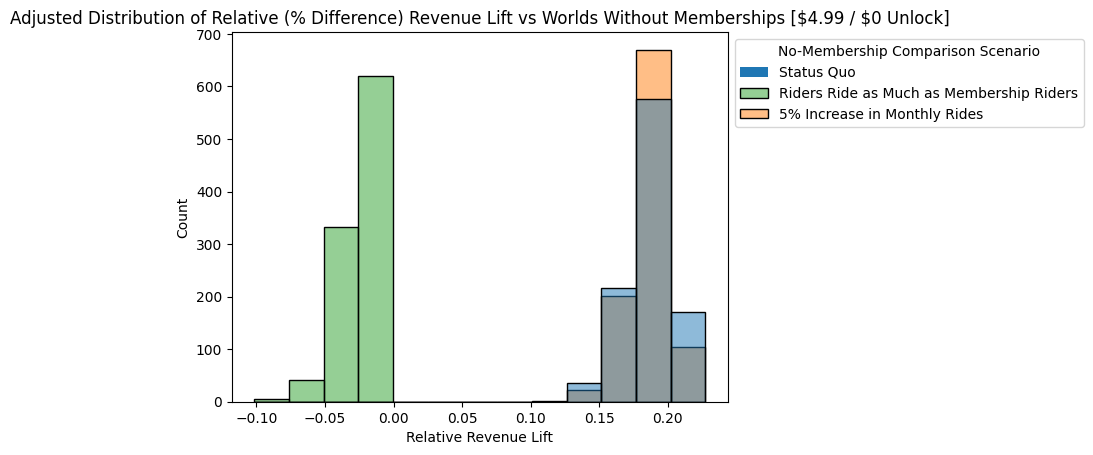

In [35]:
ax = sns.histplot([v2_499_iteration_revenue_summary_df['adj_relative1_revenue_lift'], 
                   v2_499_iteration_revenue_summary_df['adj_relative2_revenue_lift'], 
                   v2_499_iteration_revenue_summary_df['adj_relative3_revenue_lift']])

ax.set(xlabel = 'Relative Revenue Lift',
       ylabel = 'Count',
       title = 'Adjusted Distribution of Relative (% Difference) Revenue Lift vs Worlds Without Memberships [\$4.99 / \$0 Unlock]')
plt.legend(title="No-Membership Comparison Scenario",
          labels=["Status Quo", "Riders Ride as Much as Membership Riders", "5% Increase in Monthly Rides"],
          bbox_to_anchor=(1, 1))
plt.show()